![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Wizualizacja danych </h1>
<h2> 9-11. <i>Mapy</i> [laboratoria]</h2>
<h3>Tomasz Górecki (2021)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)

In [1]:
library(repr) # To resize plots in Jupyter
options(repr.plot.width = 16, repr.plot.height = 9)

# Mapy wykonane za pomocą pakietów *ggplot2* i *sf*

In [2]:
library(ggplot2)
library(sf) # Spatial data format
library(rnaturalearth) # Provides a map of countries of the entire world
library(ggspatial) # Scale bar and North arrow
library(maps) # USA
library(googleway) # Access to Google Maps APIs,
library(ggrepel) # Flexible approach to deal with label placement
library(cowplot) # Grid plots
library(ggmap) # Google maps

theme_set(theme_bw()) # Theme appropriate for maps

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘sf’ was built under R version 3.6.2”
Linking to GEOS 3.7.2, GDAL 2.4.2, PROJ 5.2.0

Warning message:
“package ‘ggspatial’ was built under R version 3.6.2”
Warning message:
“package ‘googleway’ was built under R version 3.6.2”
Warning message:
“package ‘ggrepel’ was built under R version 3.6.2”
Warning message:
“package ‘cowplot’ was built under R version 3.6.2”
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.


Attaching package: ‘ggmap’


The following object is masked from ‘package:cowplot’:

    theme_nothing




## Dane

In [3]:
world <- ne_countries(scale = 'medium', returnclass = 'sf') # Data

## Prosta mapa

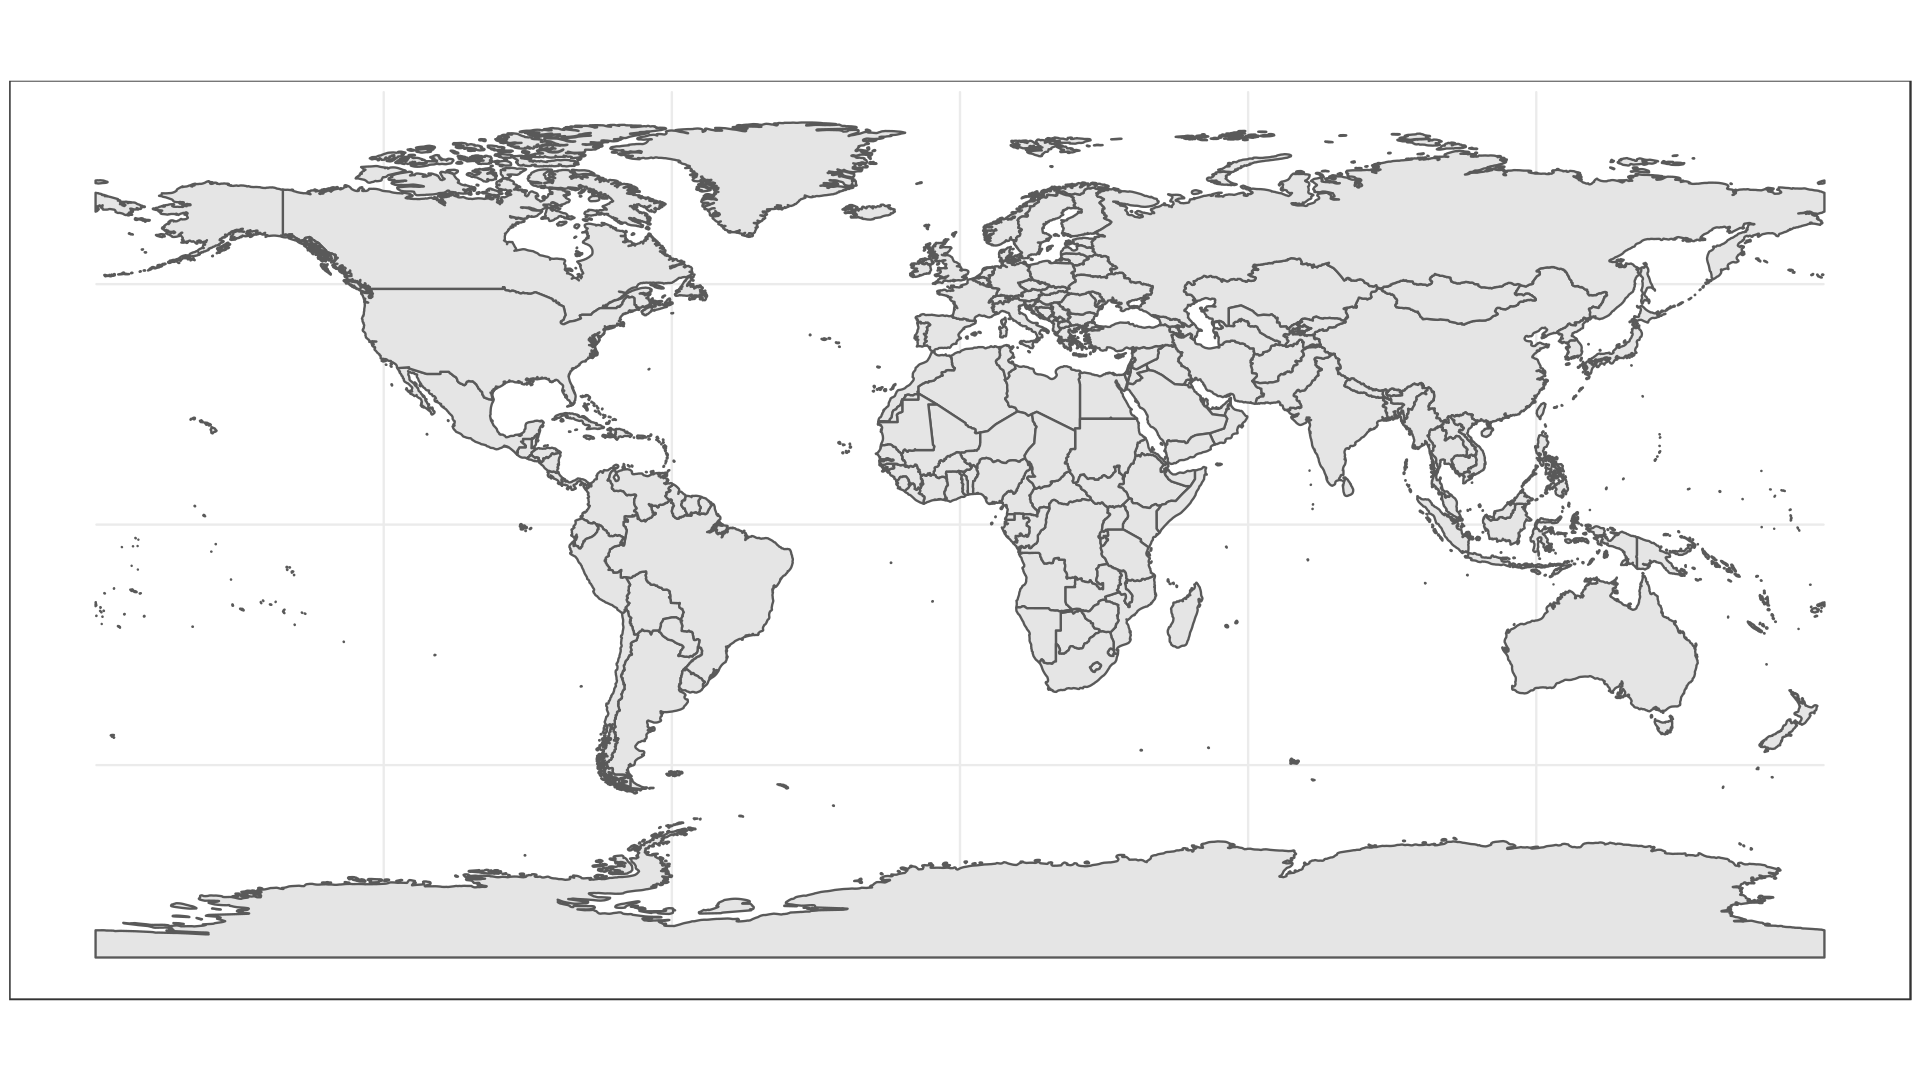

In [4]:
ggplot(data = world) +
  geom_sf()

## Osie i tytuły

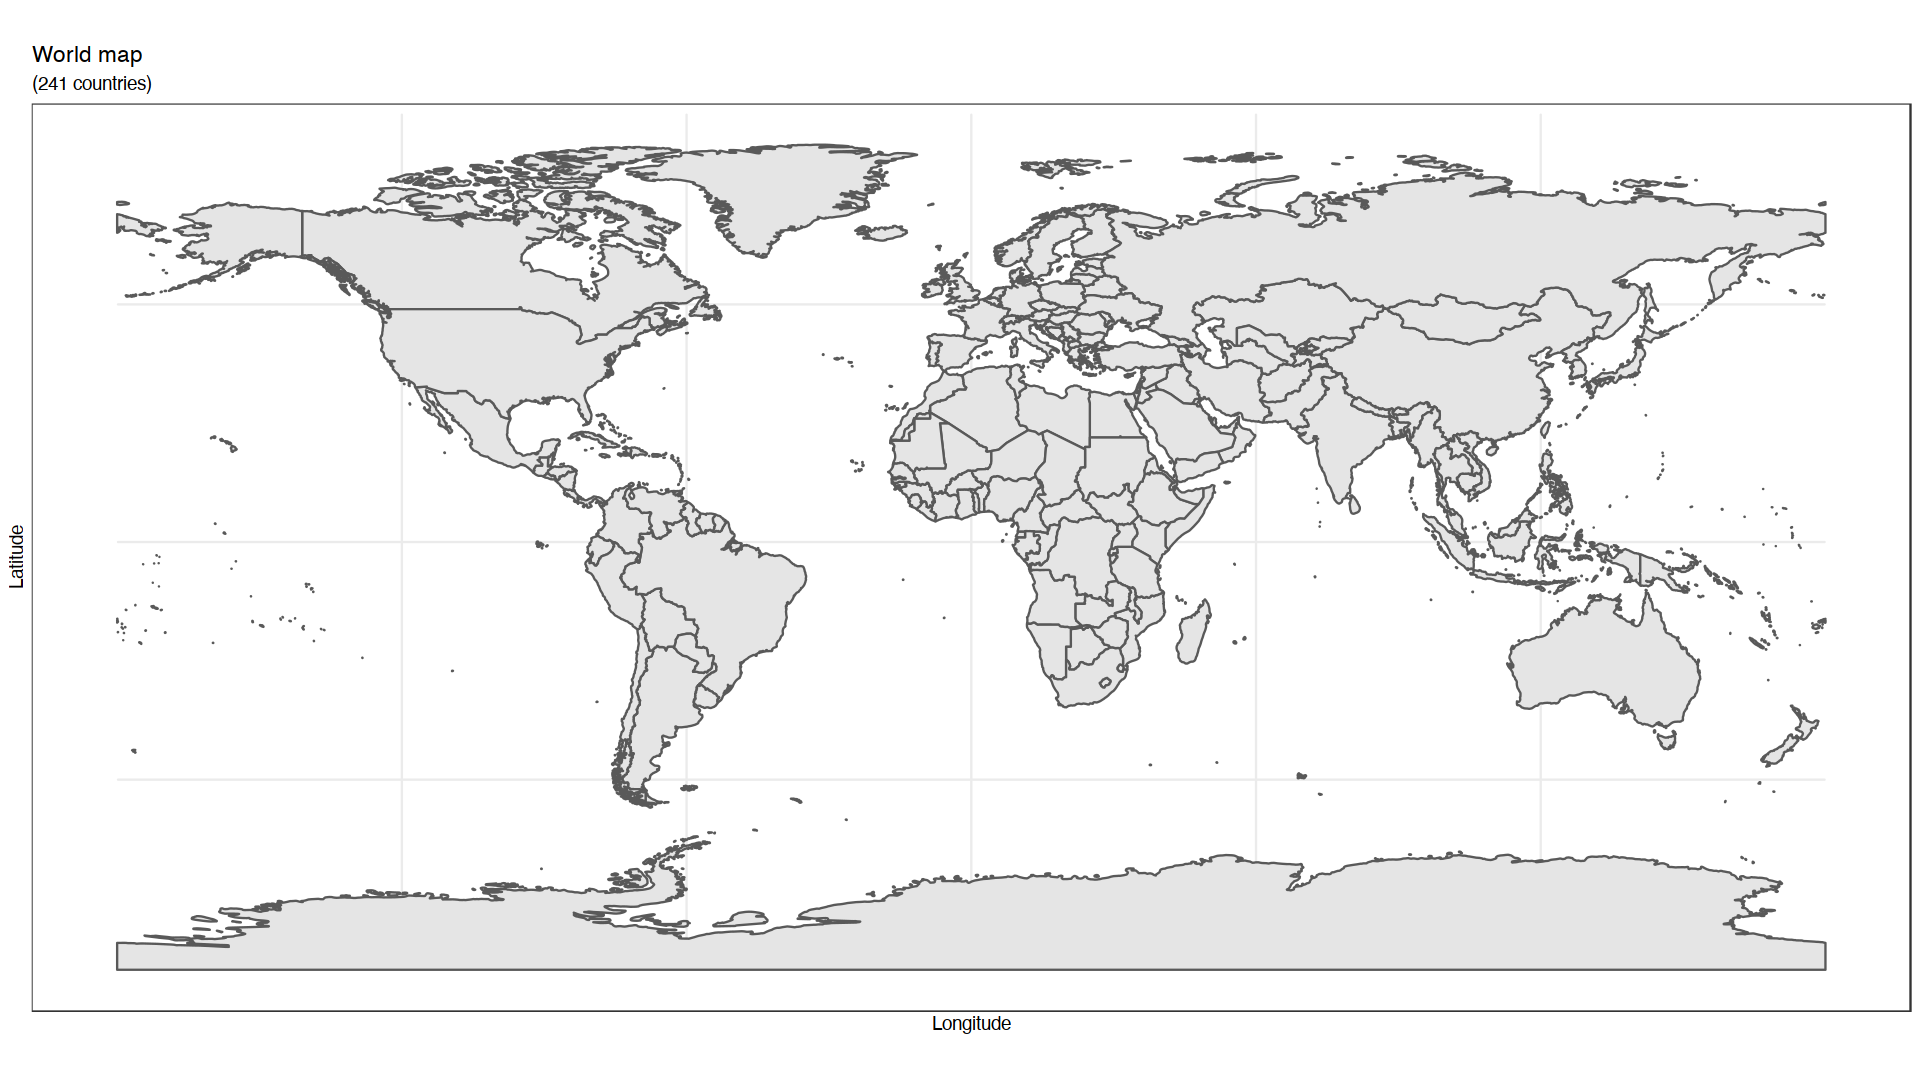

In [5]:
ggplot(data = world) +
    geom_sf() +
    xlab("Longitude") + ylab("Latitude") +
    ggtitle("World map", subtitle = paste0("(", length(unique(world$name)), " countries)"))

## Kolory

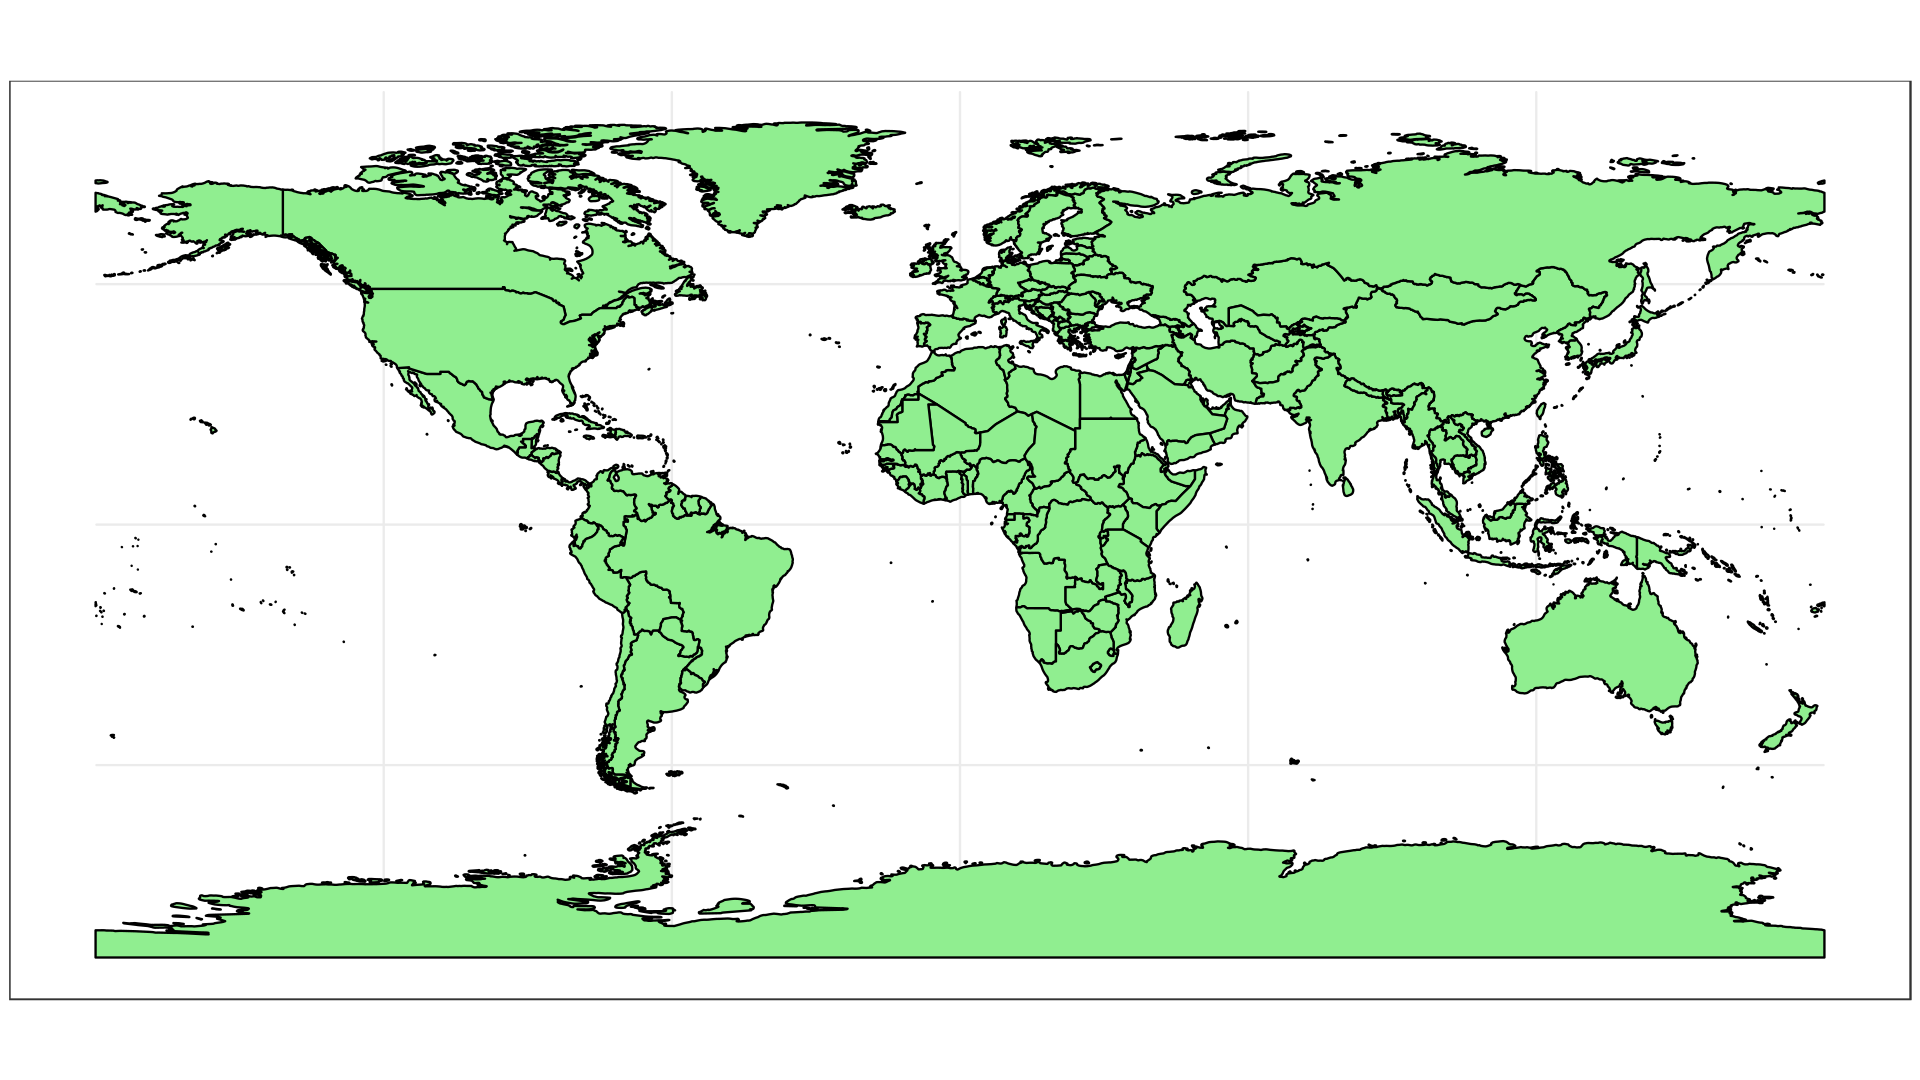

In [6]:
ggplot(data = world) + 
    geom_sf(color = "black", fill = "lightgreen")

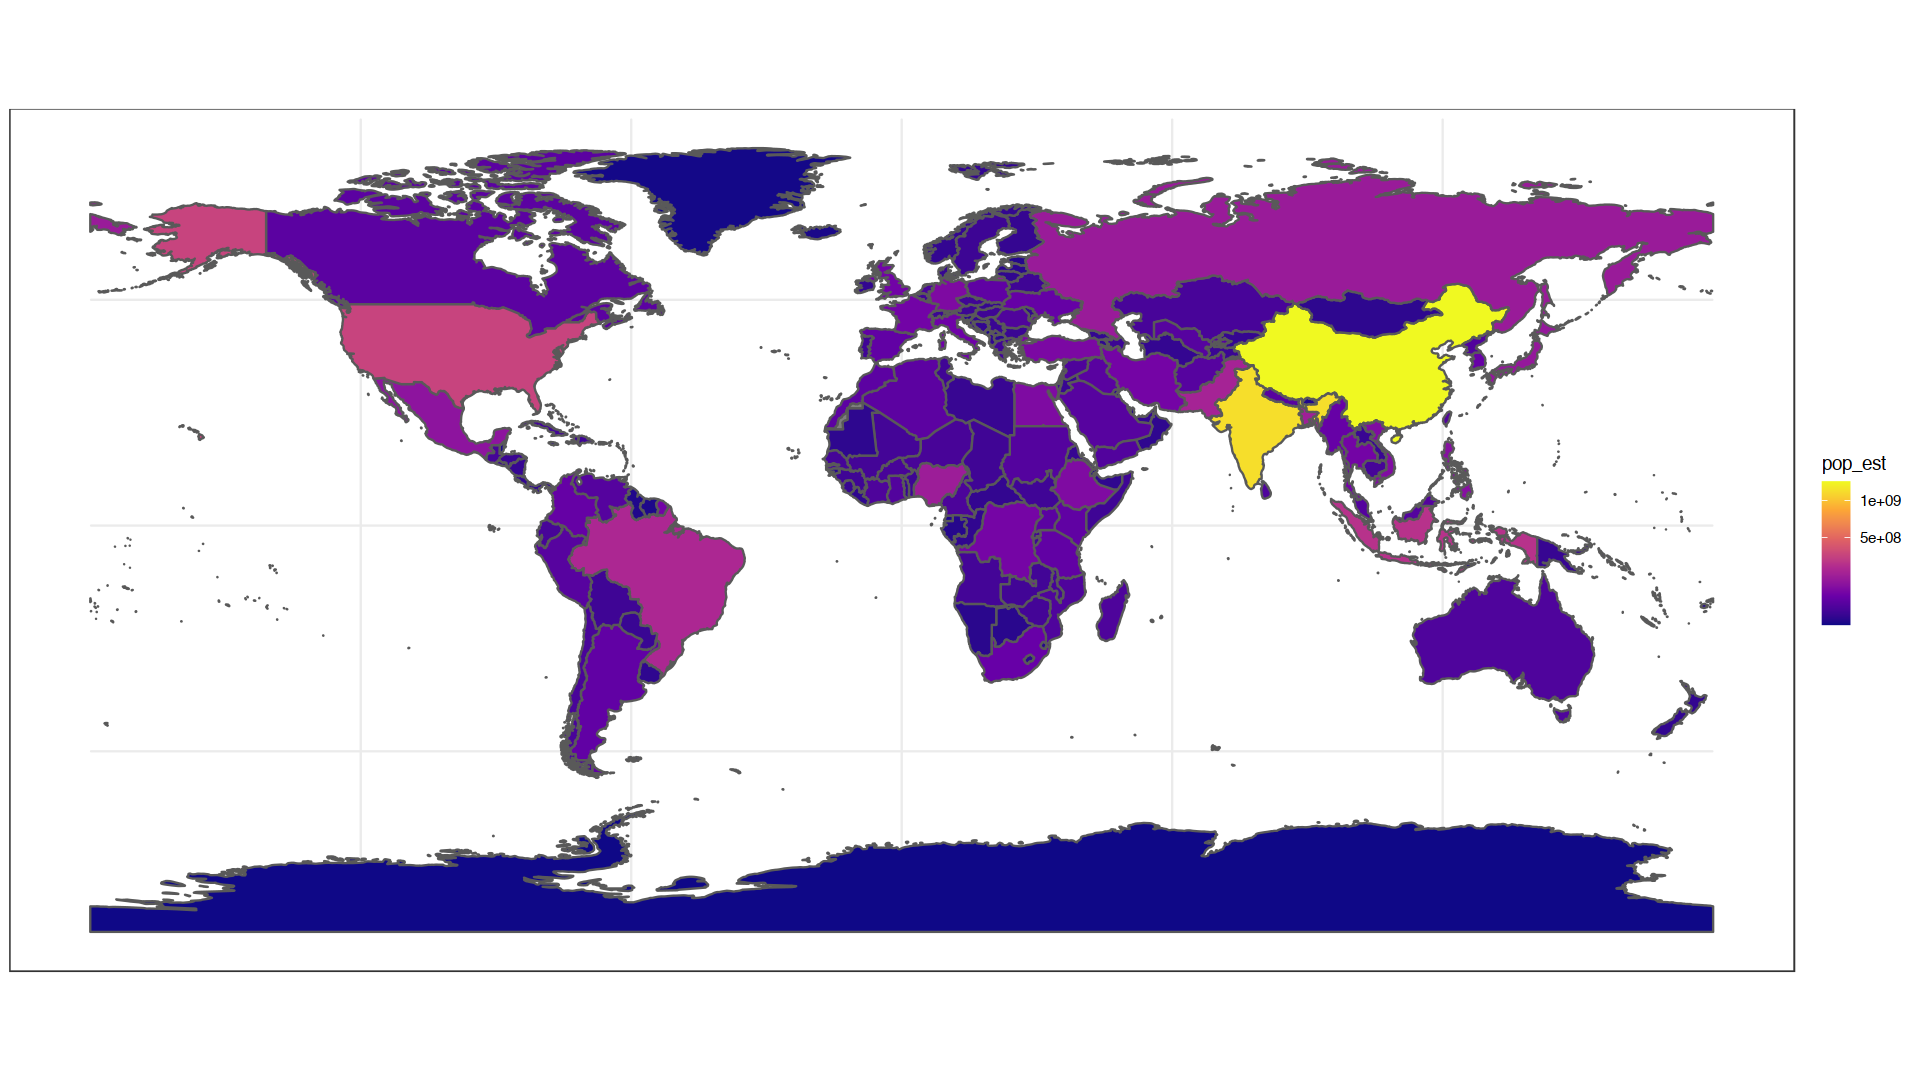

In [7]:
ggplot(data = world) +
    geom_sf(aes(fill = pop_est)) +
    scale_fill_viridis_c(option = "plasma", trans = "sqrt") # colorblind-friendly palette

## Projekcja i zakres (projection and extent)

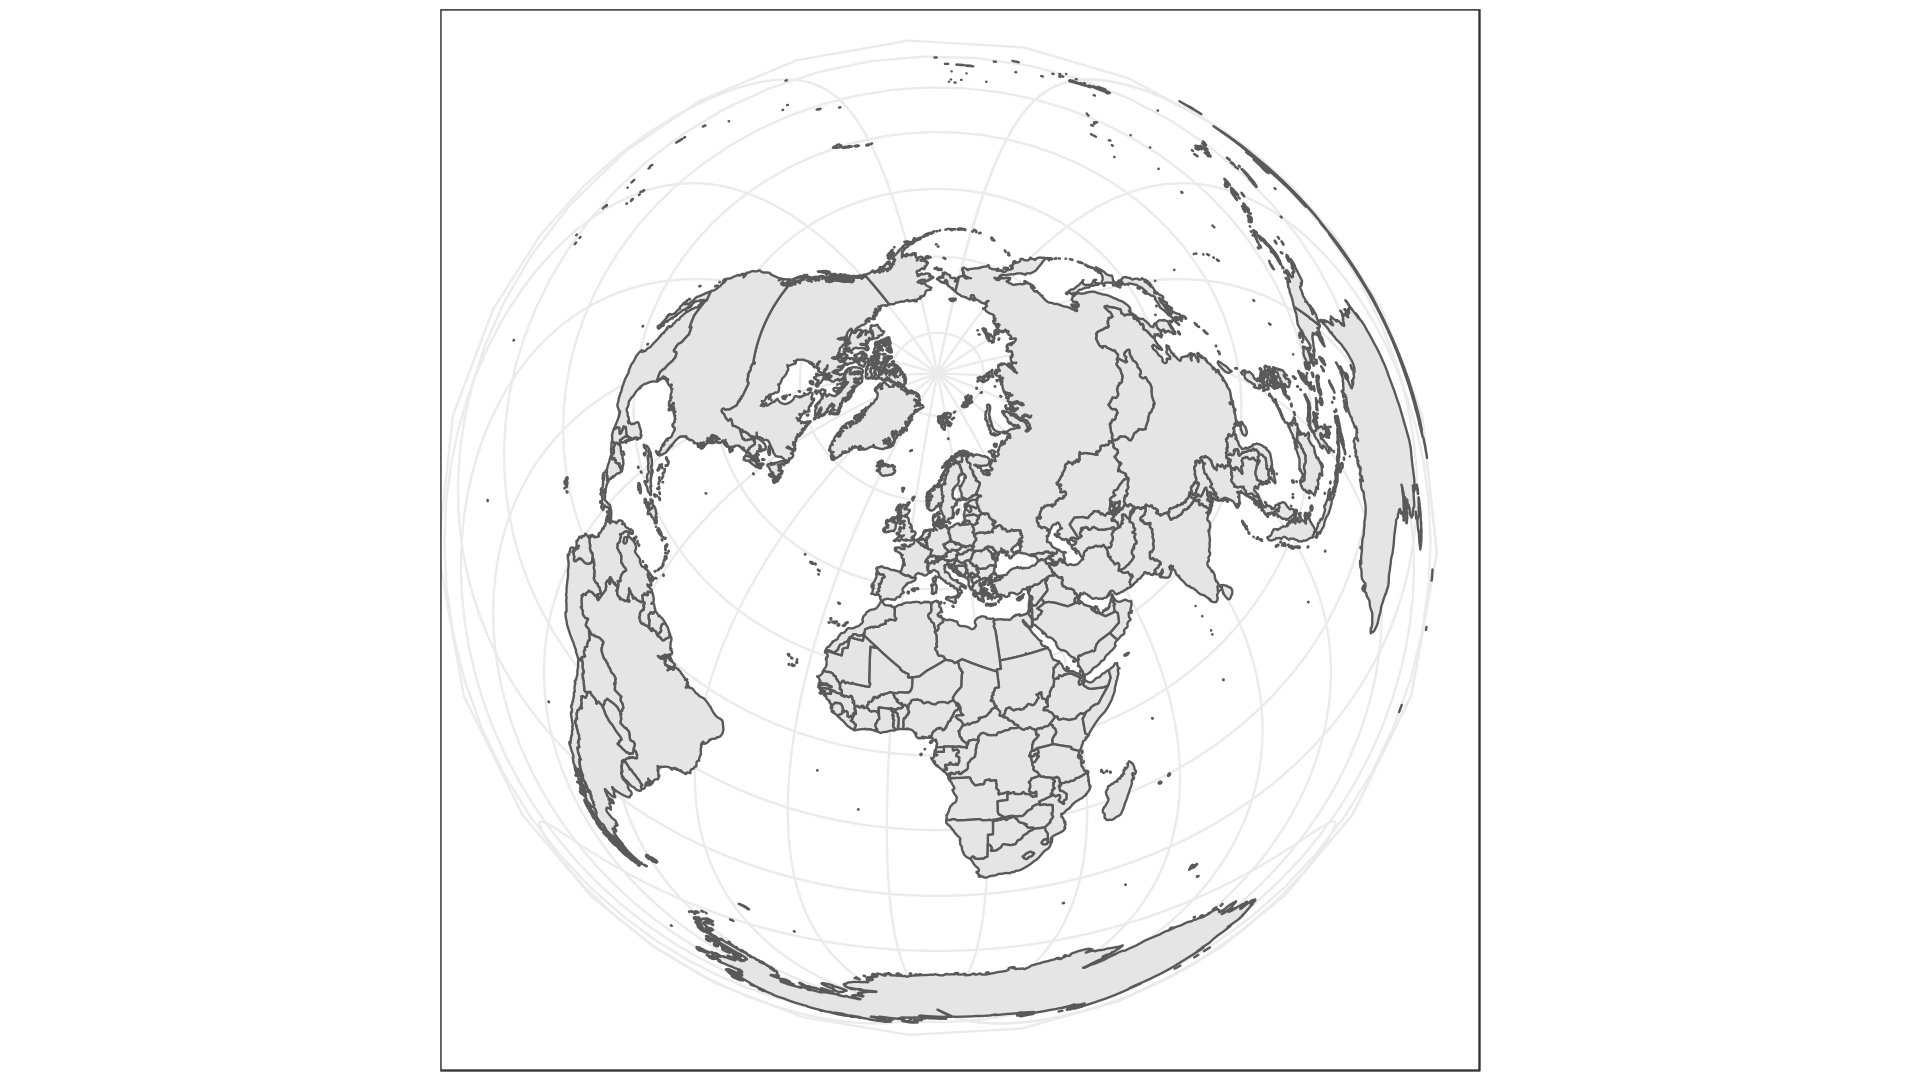

In [8]:
ggplot(data = world) +
    geom_sf() +
    coord_sf(crs = st_crs(3035))

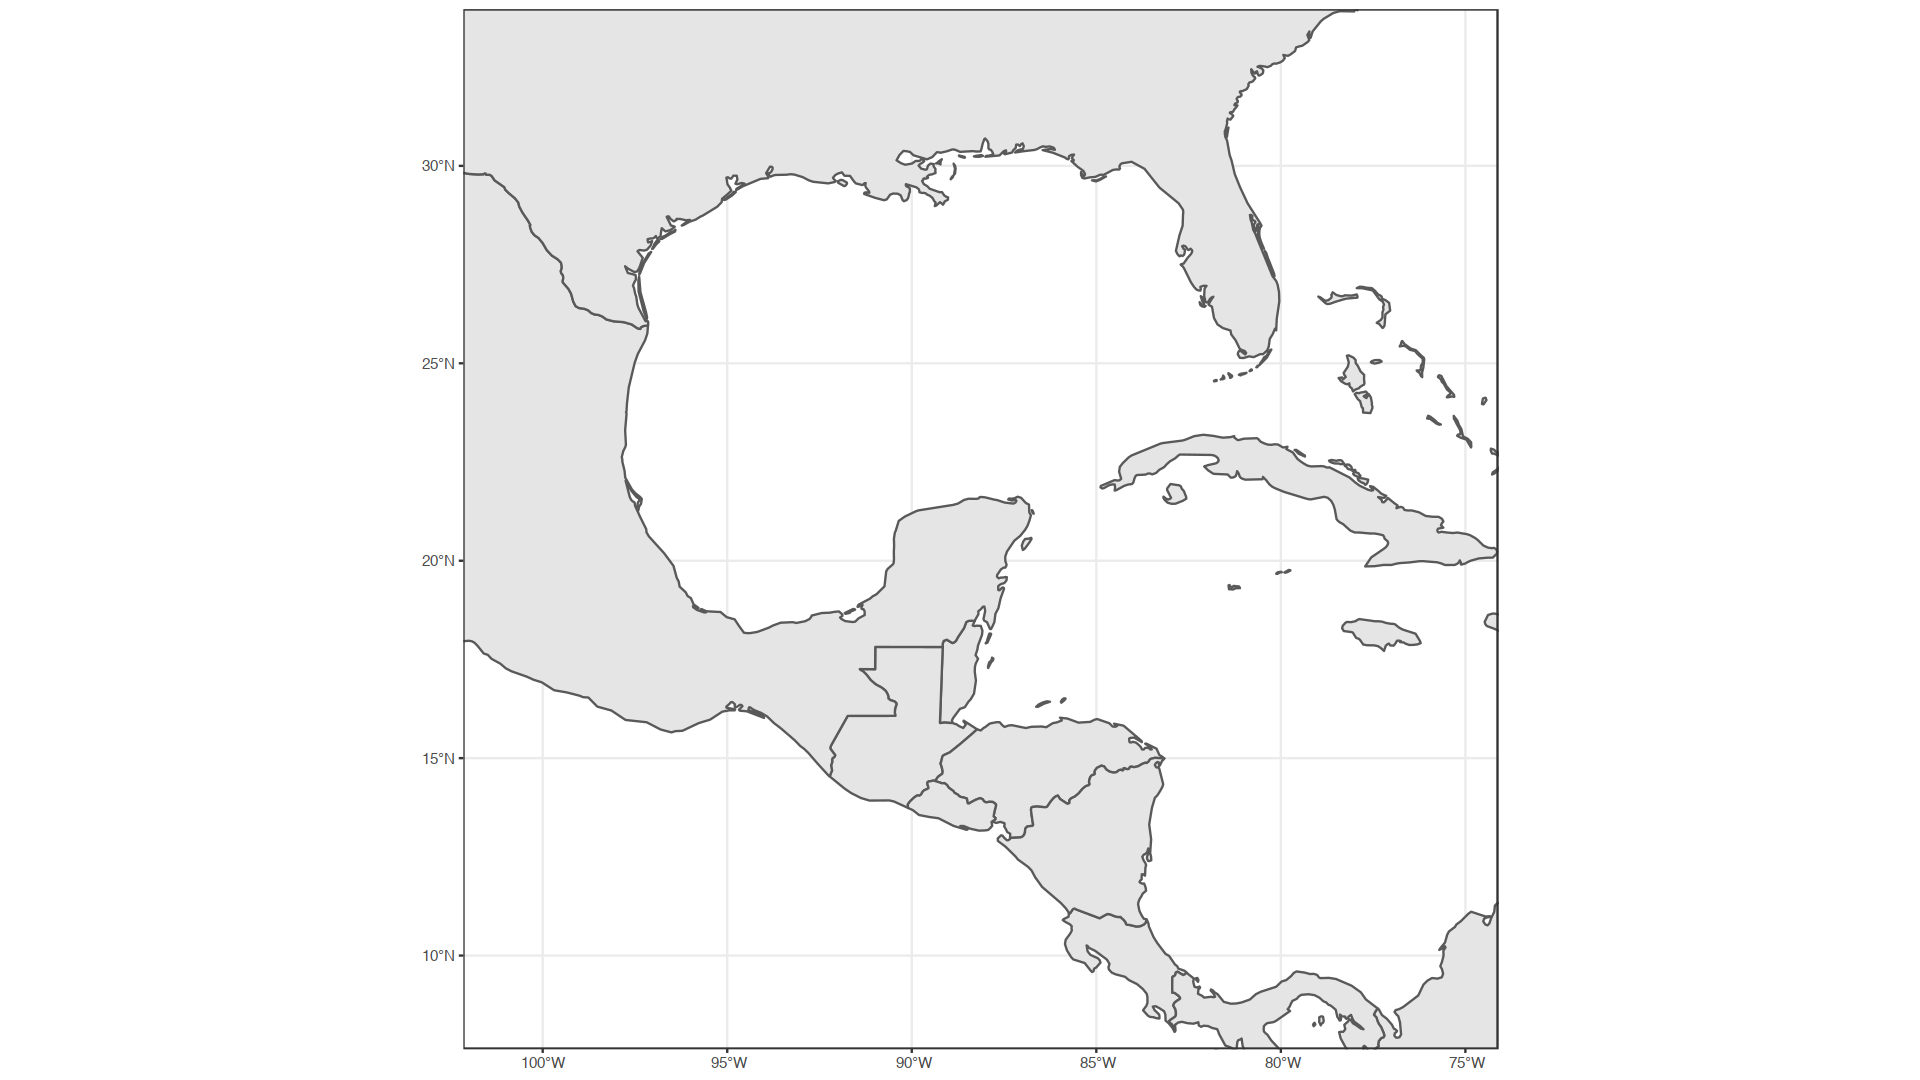

In [9]:
ggplot(data = world) +
    geom_sf() +
    coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97), expand = FALSE)

## Skala oraz strzałka

Scale on map varies by more than 10%, scale bar may be inaccurate



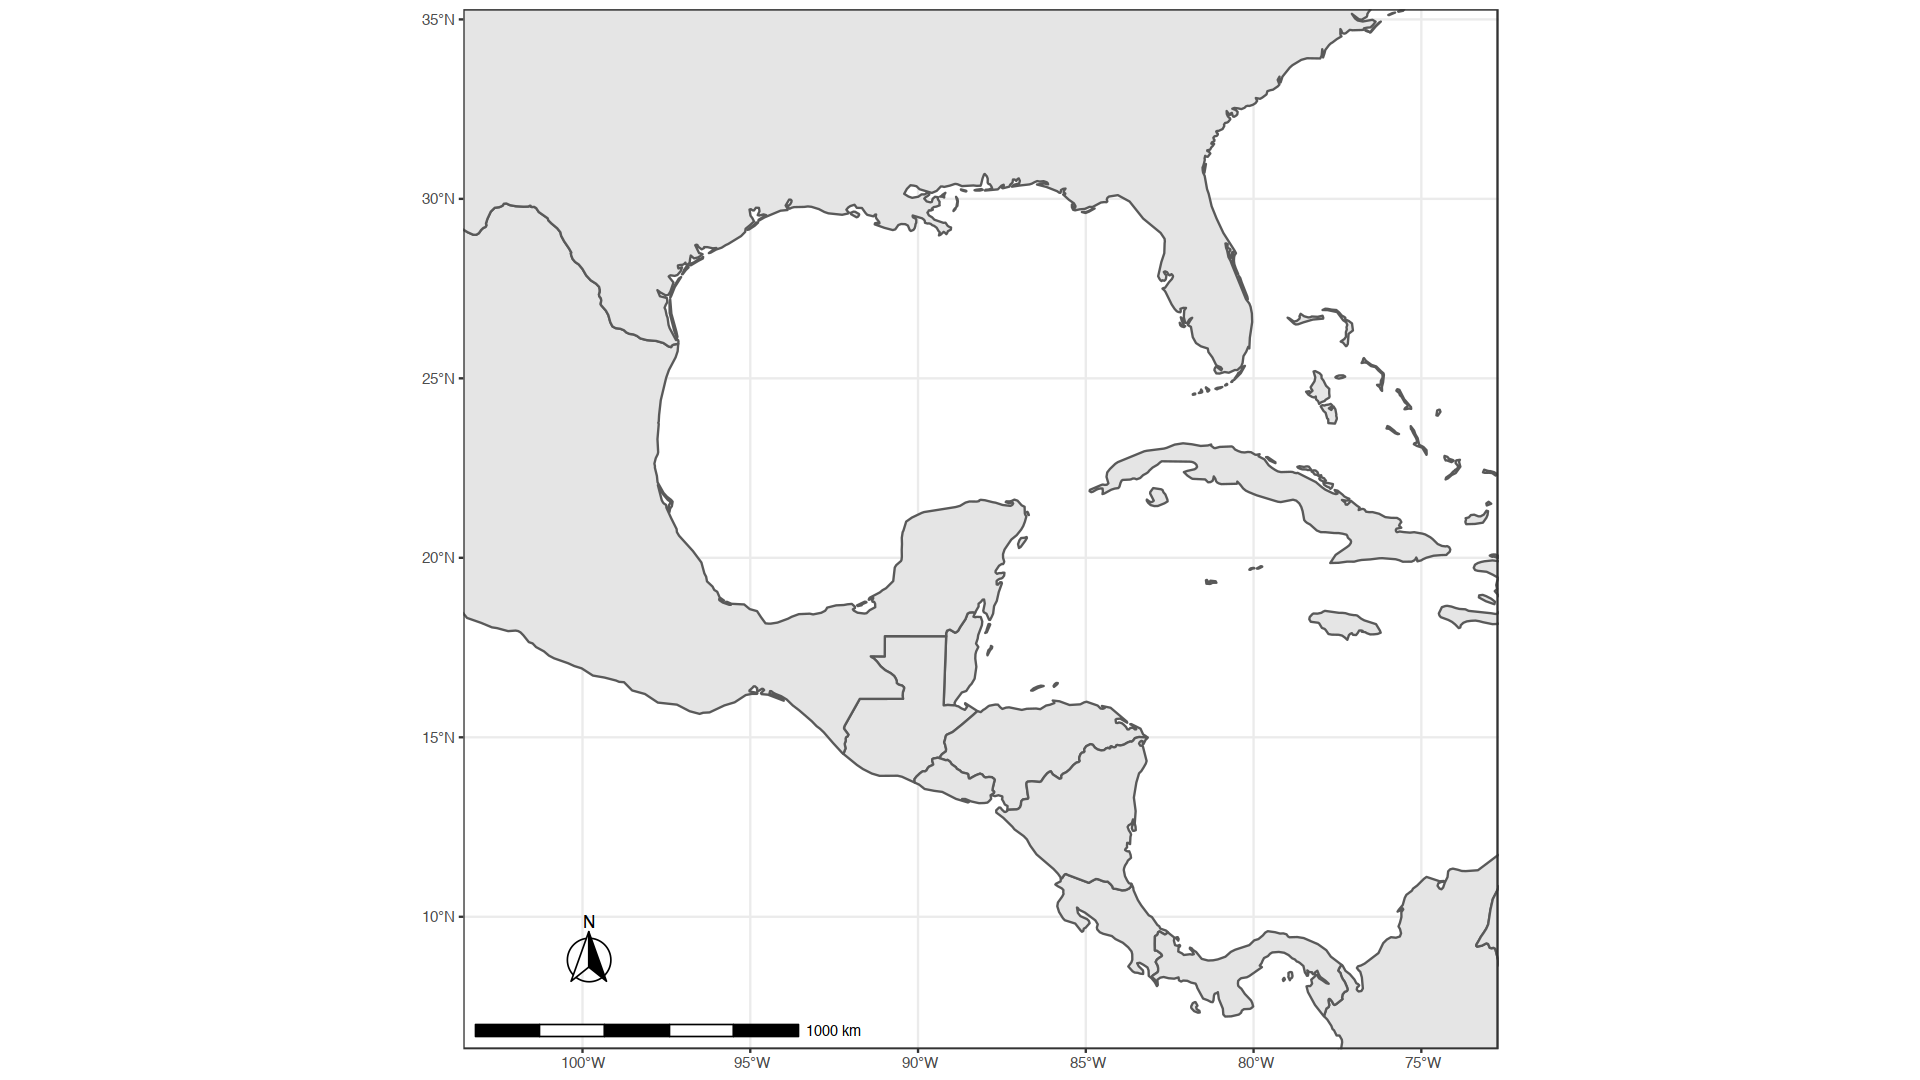

In [10]:
ggplot(data = world) +
  geom_sf() +
  annotation_scale(location = "bl", width_hint = 0.5) +
  annotation_north_arrow(location = "bl", which_north = "true", 
                         pad_x = unit(0.75, "in"), pad_y = unit(0.5, "in"),
                         style = north_arrow_fancy_orienteering) +
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97))

## Nazwy

Warning message in st_centroid.sf(world):
“st_centroid assumes attributes are constant over geometries of x”
Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
“st_centroid does not give correct centroids for longitude/latitude data”
Warning message in st_centroid.sfc(world$geometry):
“st_centroid does not give correct centroids for longitude/latitude data”


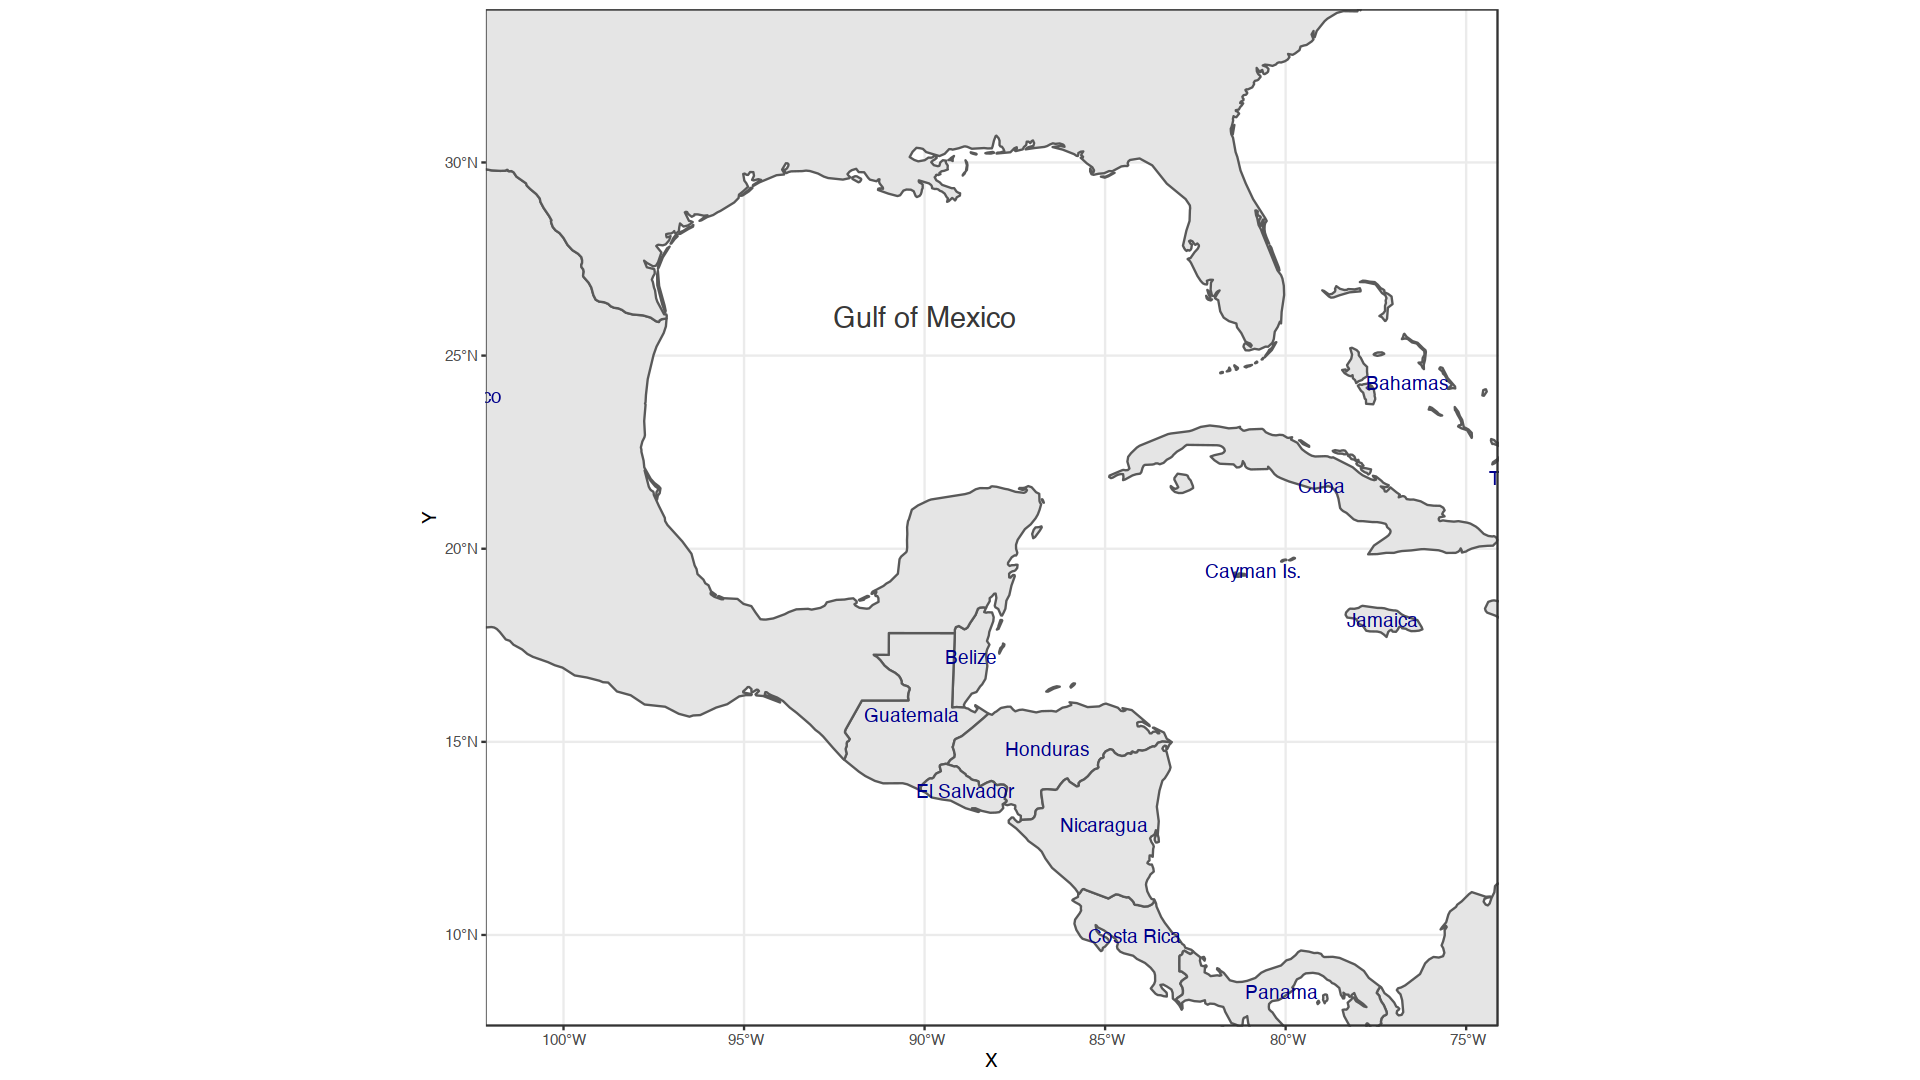

In [11]:
world_points <- st_centroid(world)
world_points <- cbind(world, st_coordinates(st_centroid(world$geometry)))

ggplot(data = world) +
geom_sf() +
geom_text(data= world_points,aes(x=X, y=Y, label=name),
    color = "darkblue", fontface = "bold", check_overlap = FALSE) +
annotate(geom = "text", x = -90, y = 26, label = "Gulf of Mexico", 
    fontface = "italic", color = "grey22", size = 6) +
coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97), expand = FALSE)

## Ostateczna mapa Zatoki Meksykańskiej

Scale on map varies by more than 10%, scale bar may be inaccurate



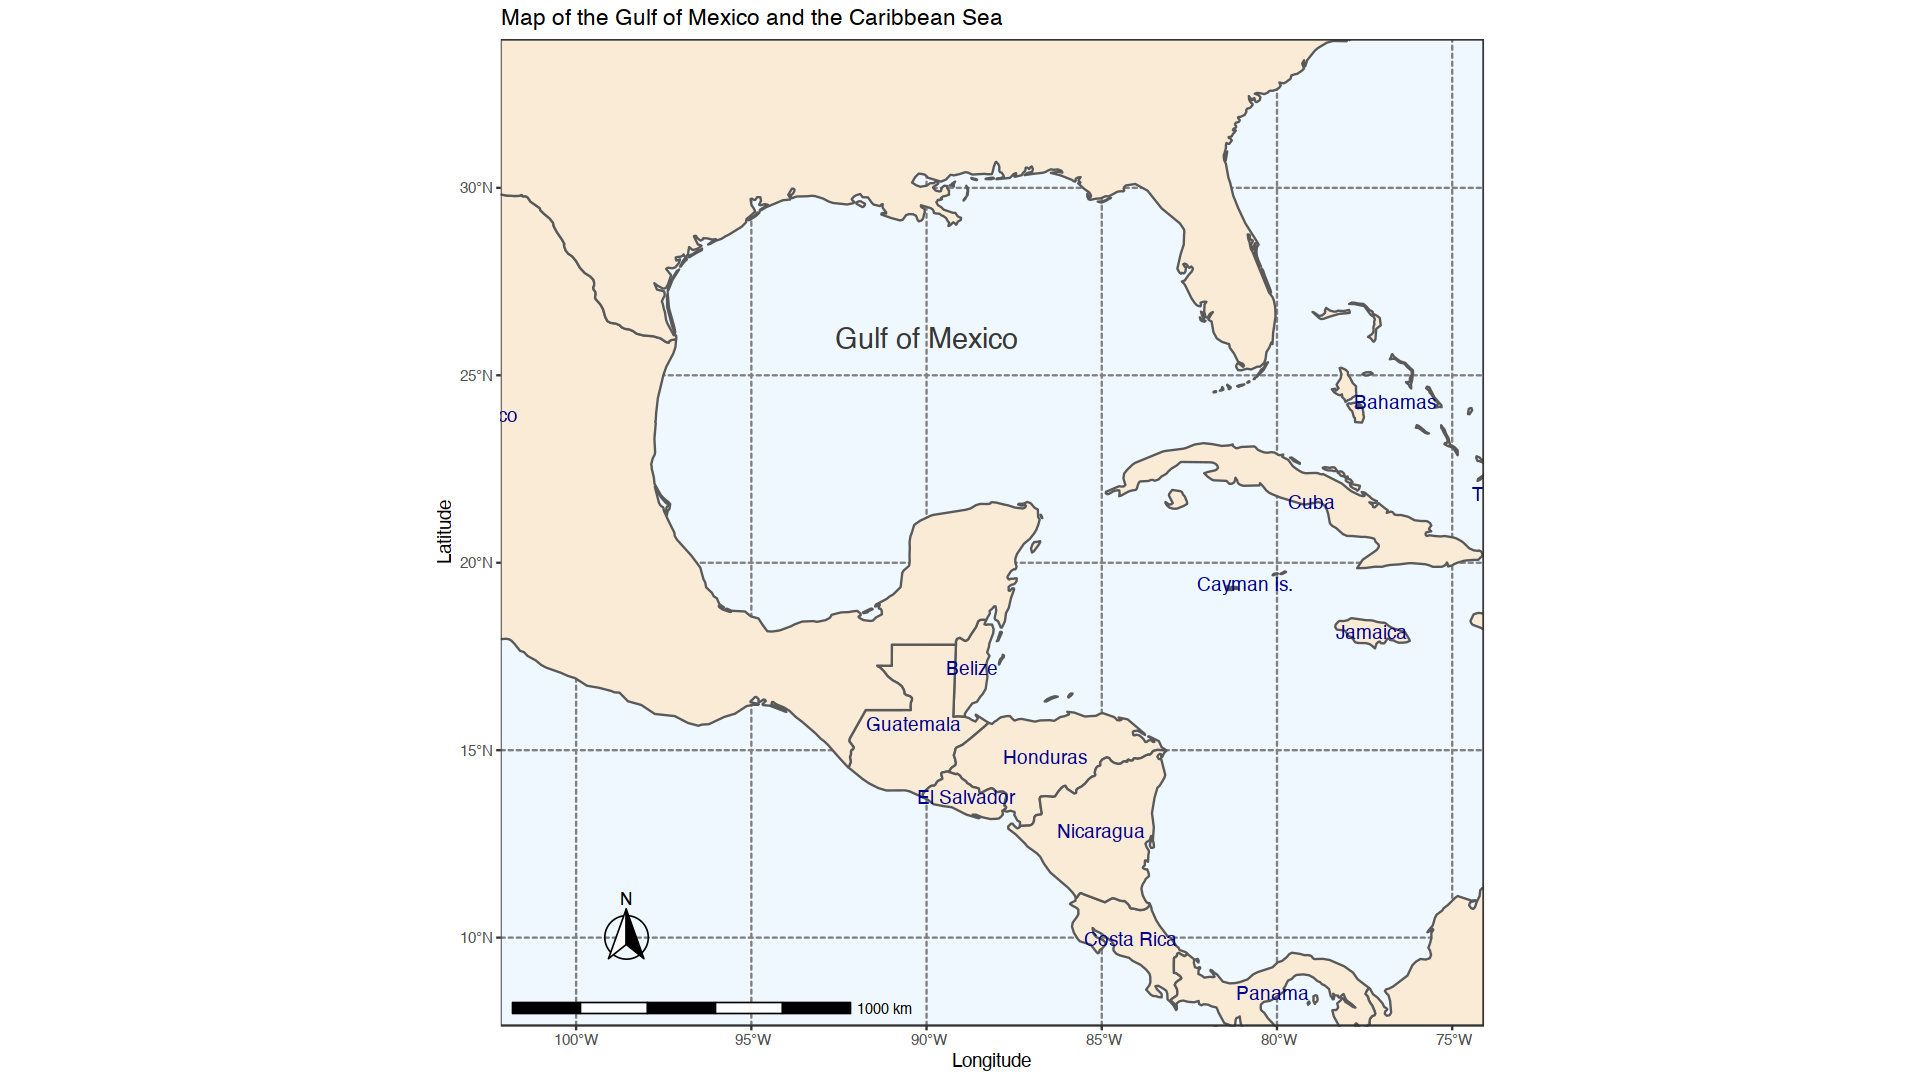

In [12]:
ggplot(data = world) + 
  geom_sf(fill= 'antiquewhite') + 
  geom_text(data = world_points, 
            aes(x = X, y = Y, label = name), 
            color = 'darkblue', 
            fontface = 'bold', check_overlap = FALSE) + 
  annotate(geom = 'text', 
           x = -90, 
           y = 26, 
           label = 'Gulf of Mexico', 
           fontface = 'italic', 
           color = 'grey22',
           size = 6) + 
  annotation_scale(location = 'bl', 
                   width_hint = 0.5) + 
  annotation_north_arrow(location = 'bl', 
                         which_north = 'true', 
                         pad_x = unit(0.75, 'in'), 
                         pad_y = unit(0.5, 'in'), 
                         style = north_arrow_fancy_orienteering) + 
  coord_sf(xlim = c(-102.15, -74.12), 
           ylim = c(7.65, 33.97), 
           expand = FALSE) + 
  xlab('Longitude') + 
  ylab('Latitude') + 
  ggtitle('Map of the Gulf of Mexico and the Caribbean Sea') + 
  theme(panel.grid.major = element_line(color = gray(0.5), 
                                        linetype = 'dashed', 
                                        size = 0.5), 
        panel.background = element_rect(fill = 'aliceblue'))


## Dodatkowe punkty na mapie

longitude latitude
1 -80.14    26.48   
2 -80.11    26.83

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



geometry            
1 POINT (-80.14 26.48)
2 POINT (-80.11 26.83)

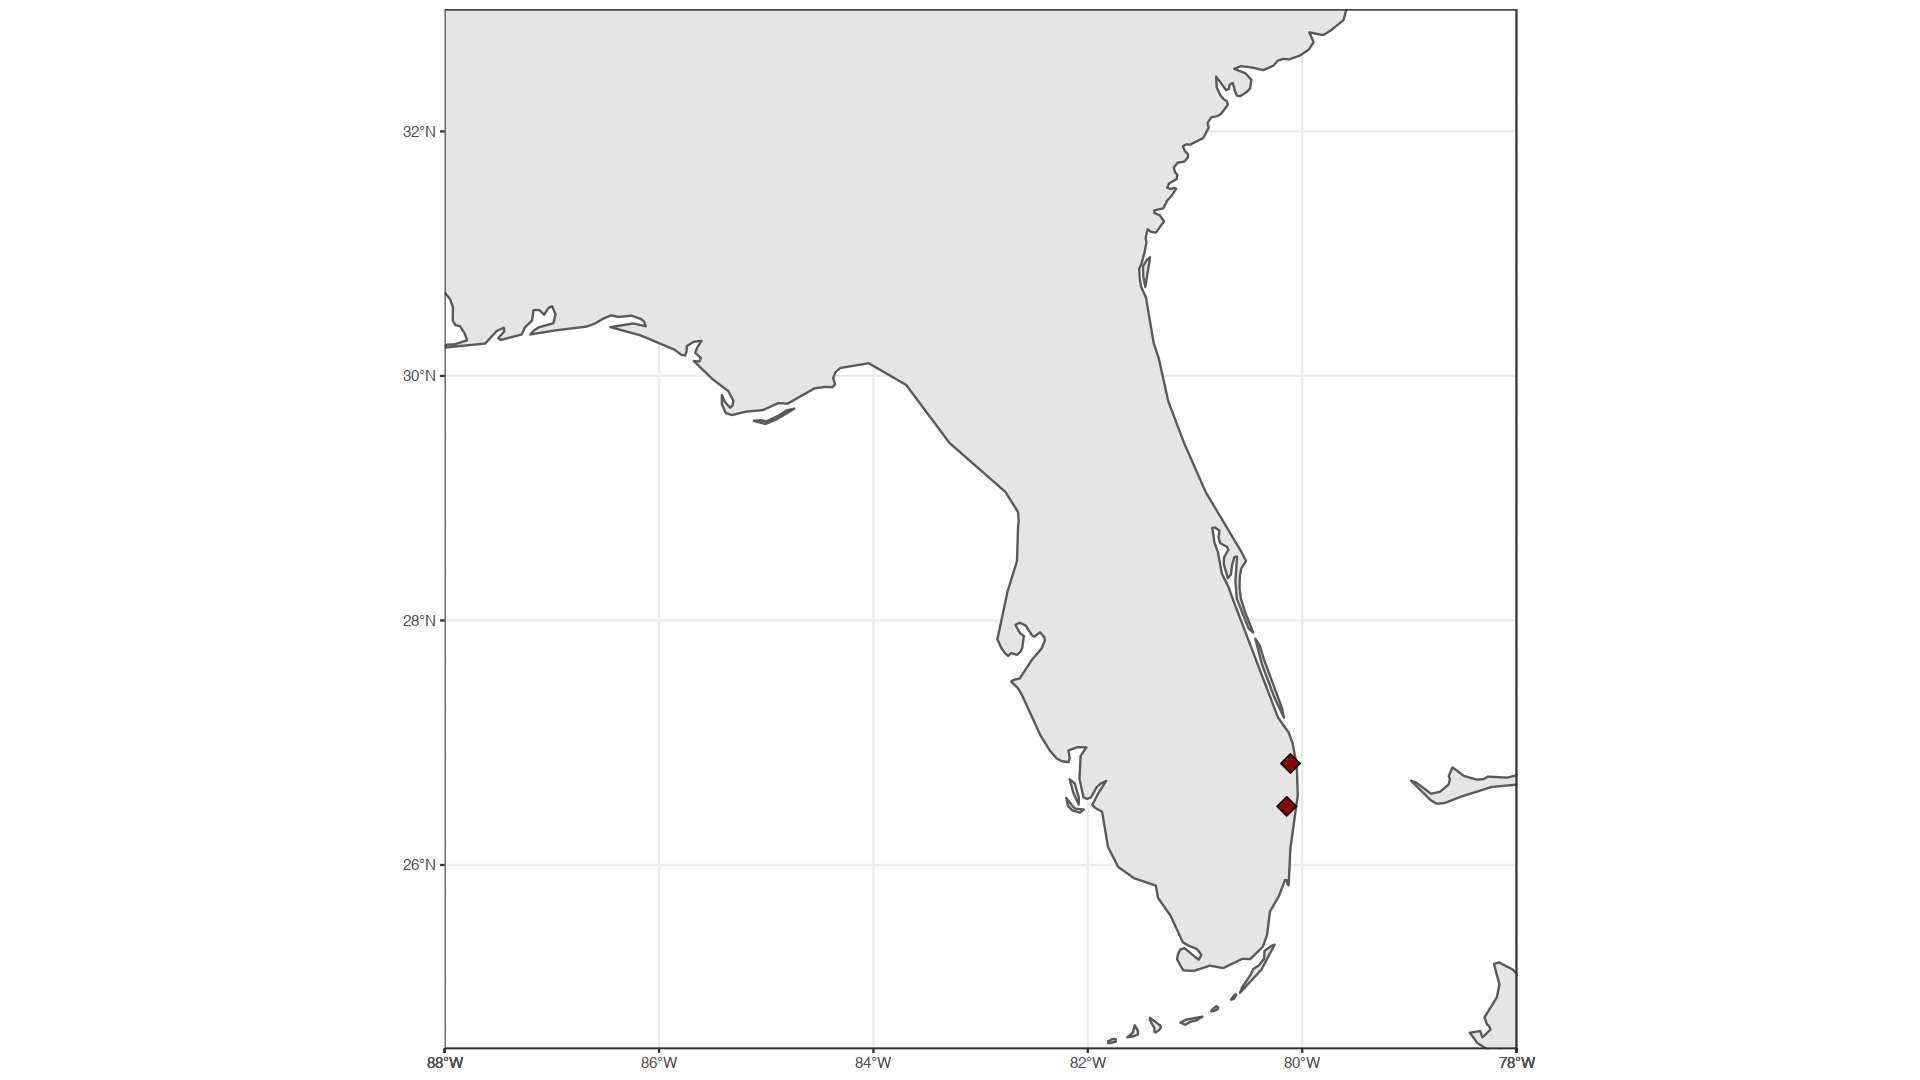

In [13]:
(sites <- data.frame(longitude = c(-80.144005, -80.109), latitude = c(26.479005, 
    26.83))) # Data for points

(sites <- st_as_sf(sites, coords = c("longitude", "latitude"), 
    crs = 4326, agr = "constant")) # Change format

ggplot(data = world) +
    geom_sf() +
    geom_sf(data = sites, size = 4, shape = 23, fill = "darkred") +
    coord_sf(xlim = c(-88, -78), ylim = c(24.5, 33), expand = FALSE)

## Granice stanów i nazwy

In [14]:
states <- st_as_sf(map("state", plot = FALSE, fill = TRUE))
head(states)

states <- cbind(states, st_coordinates(st_centroid(states)))

states$ID <- tools::toTitleCase(as.character(states$ID)) # Capital letter at the begining
head(states)

ID          geom                          
1 alabama     MULTIPOLYGON (((-87.46 30.3...
2 arizona     MULTIPOLYGON (((-114.6 35.0...
3 arkansas    MULTIPOLYGON (((-94.05 33.0...
4 california  MULTIPOLYGON (((-120 42.01,...
5 colorado    MULTIPOLYGON (((-102.1 40.0...
6 connecticut MULTIPOLYGON (((-73.5 42.05...

Warning message in st_centroid.sf(states):
“st_centroid assumes attributes are constant over geometries of x”
Warning message in st_centroid.sfc(st_geometry(x), of_largest_polygon = of_largest_polygon):
“st_centroid does not give correct centroids for longitude/latitude data”


ID          X       Y     geom                          
1 Alabama      -86.83 32.80 MULTIPOLYGON (((-87.46 30.3...
2 Arizona     -111.67 34.30 MULTIPOLYGON (((-114.6 35.0...
3 Arkansas     -92.44 34.90 MULTIPOLYGON (((-94.05 33.0...
4 California  -119.60 37.27 MULTIPOLYGON (((-120 42.01,...
5 Colorado    -105.55 39.00 MULTIPOLYGON (((-102.1 40.0...
6 Connecticut  -72.73 41.63 MULTIPOLYGON (((-73.5 42.05...

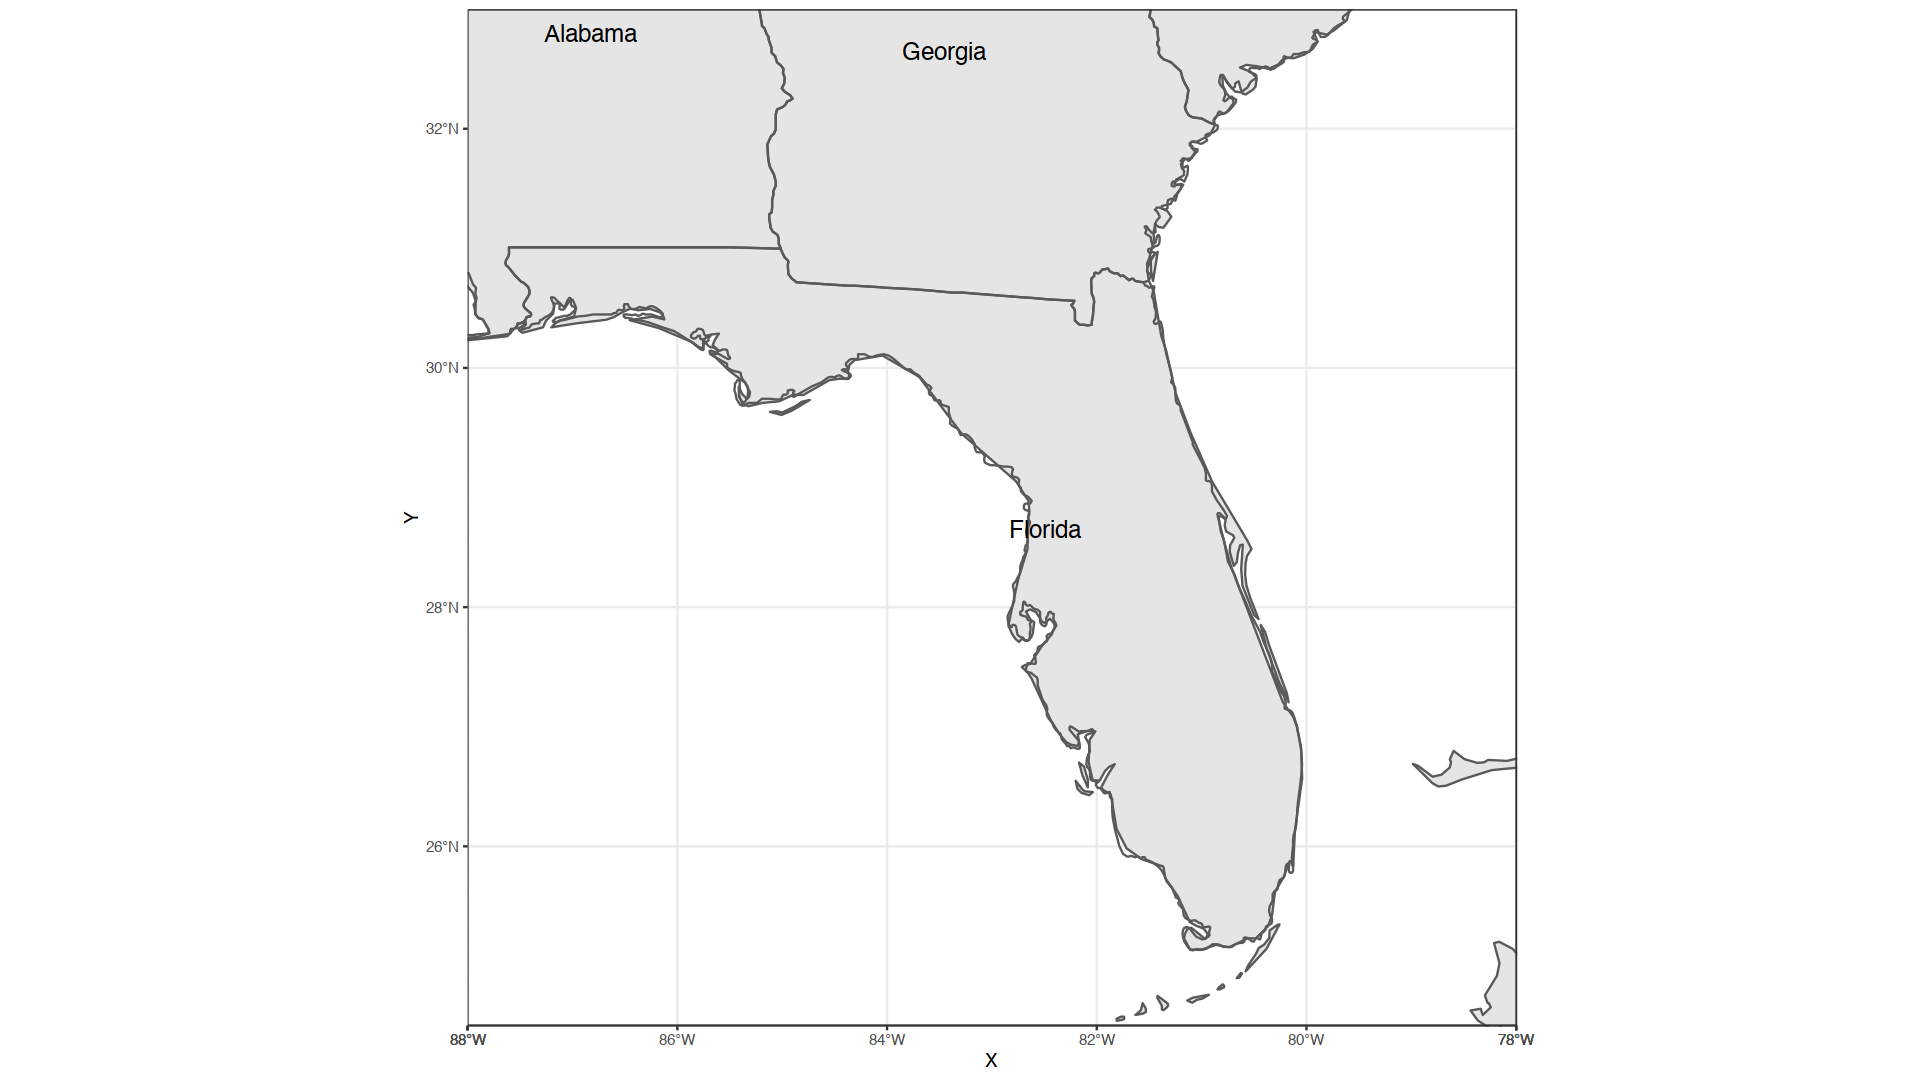

In [15]:
ggplot(data = world) +
    geom_sf() +
    geom_sf(data = states, fill = NA) + 
    geom_text(data = states, aes(X, Y, label = ID), size = 5) +
    coord_sf(xlim = c(-88, -78), ylim = c(24.5, 33), expand = FALSE)

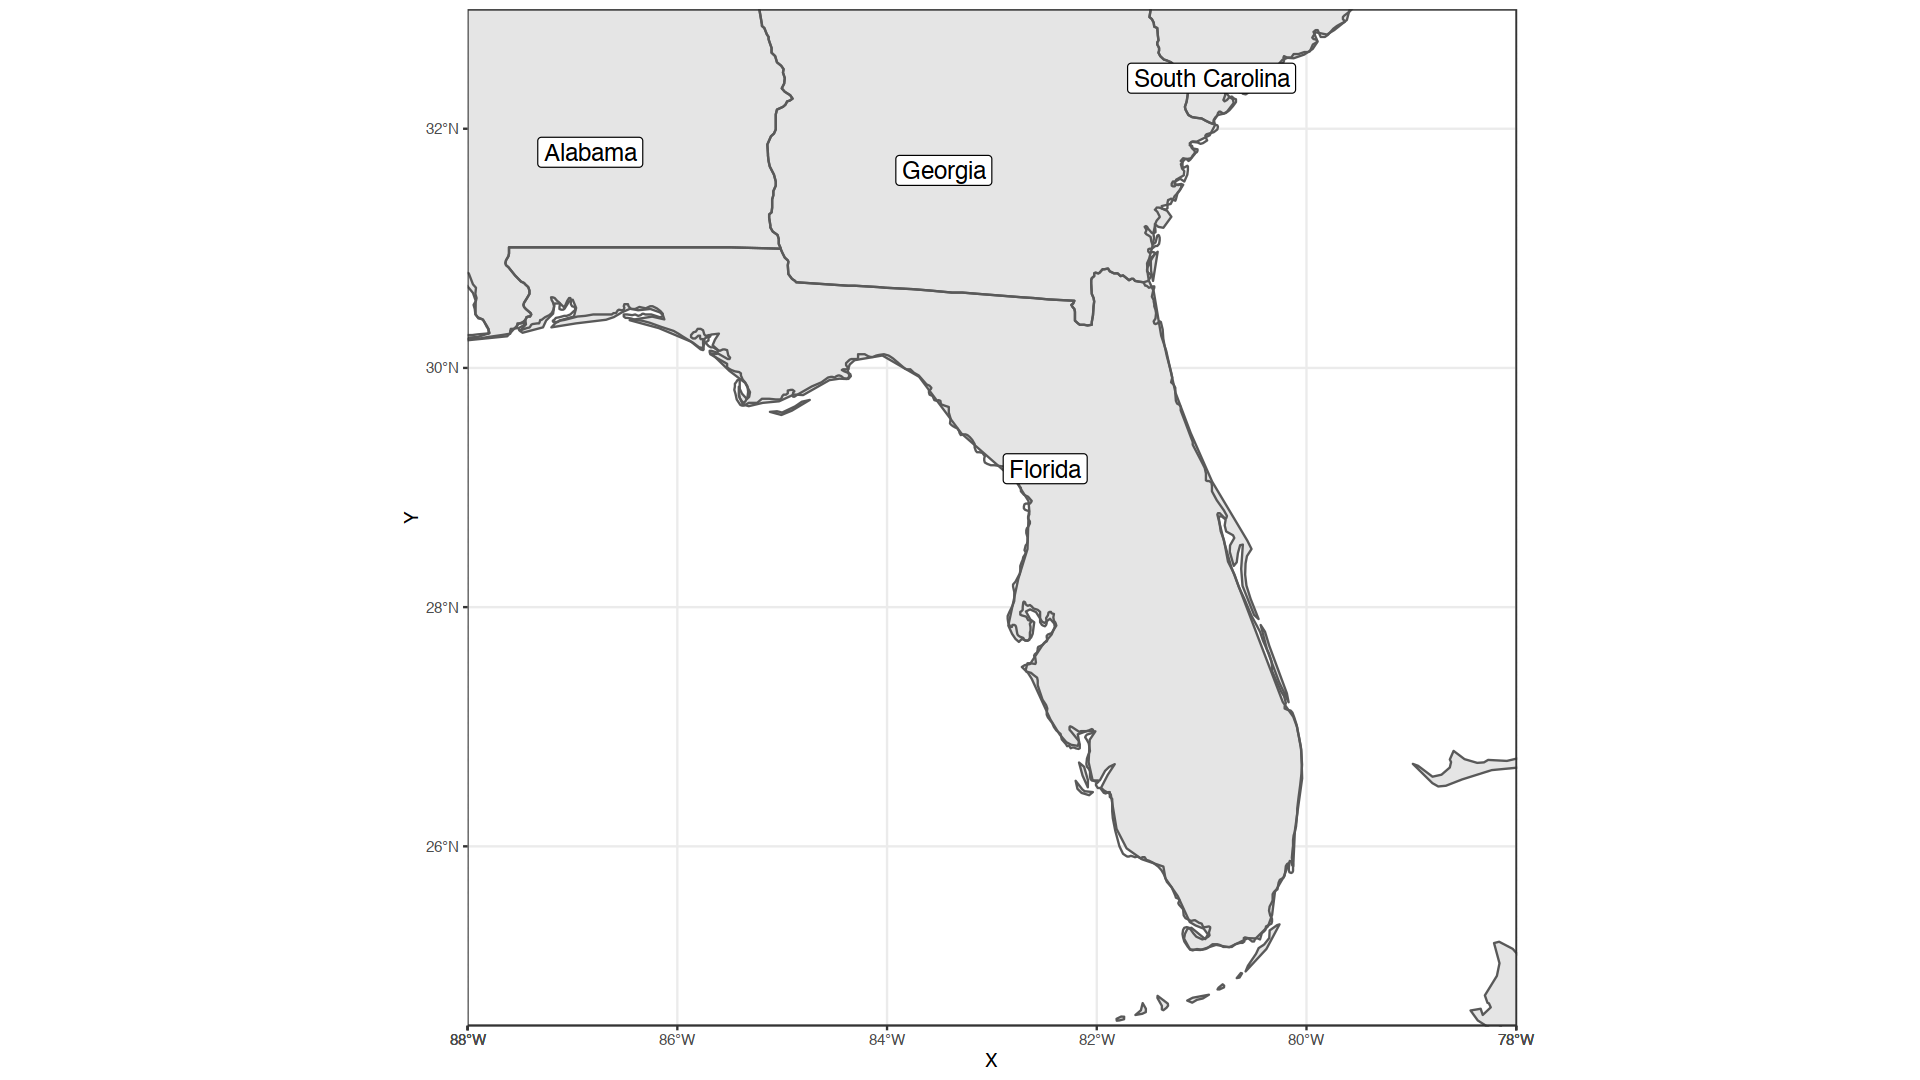

In [16]:
states$nudge_y <- -1
states$nudge_y[states$ID == "Florida"] <- 0.5
states$nudge_y[states$ID == "South Carolina"] <- -1.5

ggplot(data = world) +
    geom_sf() +
    geom_sf(data = states, fill = NA) + 
    geom_label(data = states, aes(X, Y, label = ID), size = 5, fontface = "bold", 
        nudge_y = states$nudge_y) +
    coord_sf(xlim = c(-88, -78), ylim = c(24.5, 33), expand = FALSE)

## Regiony (counties)

In [17]:
counties <- st_as_sf(map("county", plot = FALSE, fill = TRUE))
counties <- subset(counties, grepl("florida", counties$ID))
counties$area <- as.numeric(st_area(counties))
head(counties)

ID               geom                           area     
290 florida,alachua  MULTIPOLYGON (((-82.66 29.8... 2.499e+09
291 florida,baker    MULTIPOLYGON (((-82.04 30.2... 1.542e+09
292 florida,bay      MULTIPOLYGON (((-85.41 30.2... 1.947e+09
293 florida,bradford MULTIPOLYGON (((-82.43 29.9... 8.189e+08
294 florida,brevard  MULTIPOLYGON (((-80.95 28.6... 2.190e+09
295 florida,broward  MULTIPOLYGON (((-80.89 25.9... 3.167e+09

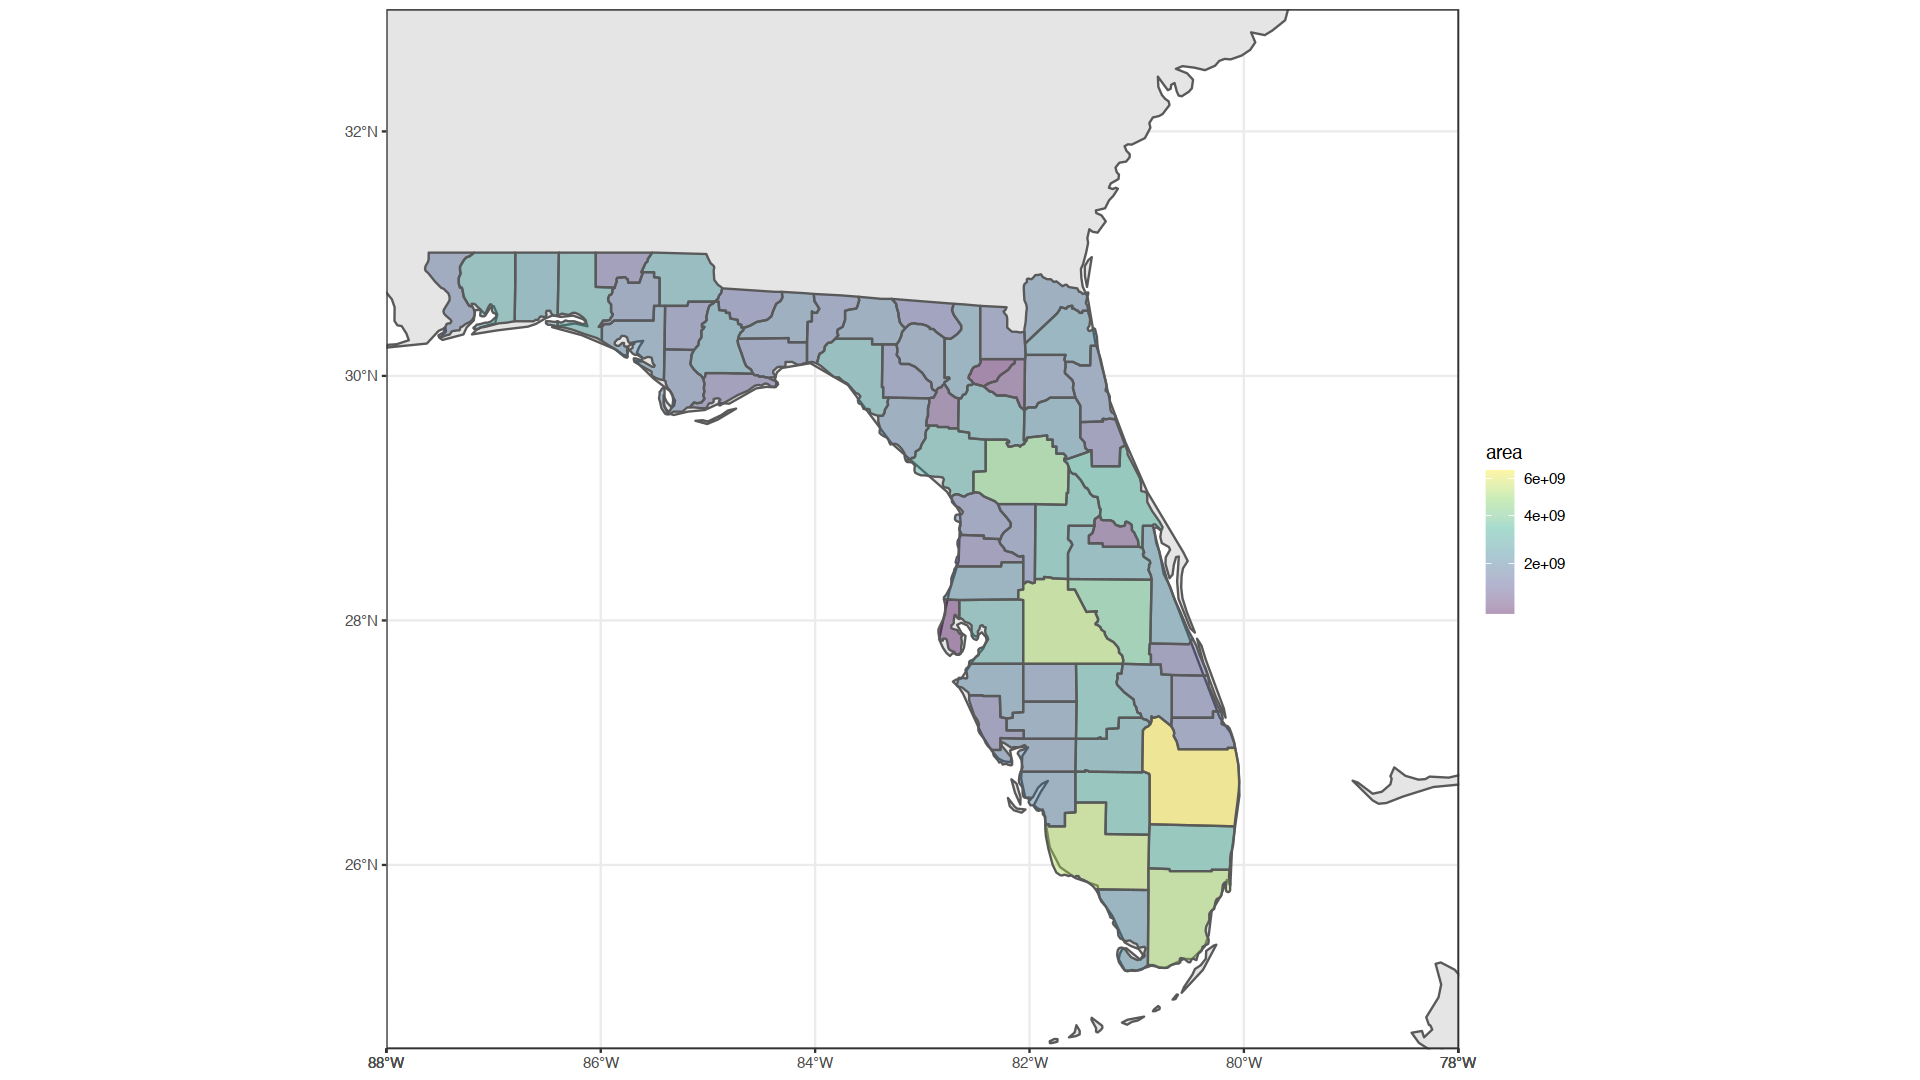

In [18]:
ggplot(data = world) +
    geom_sf() +
    geom_sf(data = counties, aes(fill = area)) +
    scale_fill_viridis_c(trans = "sqrt", alpha = .4) +
    coord_sf(xlim = c(-88, -78), ylim = c(24.5, 33), expand = FALSE)

## Miasta

In [19]:
(flcities <- data.frame(state = rep("Florida", 5), city = c("Miami", 
    "Tampa", "Orlando", "Jacksonville", "Sarasota"), lat = c(25.7616798, 
    27.950575, 28.5383355, 30.3321838, 27.3364347), lng = c(-80.1917902, 
    -82.4571776, -81.3792365, -81.655651, -82.5306527)))

state   city         lat   lng   
1 Florida Miami        25.76 -80.19
2 Florida Tampa        27.95 -82.46
3 Florida Orlando      28.54 -81.38
4 Florida Jacksonville 30.33 -81.66
5 Florida Sarasota     27.34 -82.53

In [20]:
key <- "" # Real key needed!!!; Directions API, Geocoding API, Geolocation API, Maps Static API shoud be enabled
flcities <- data.frame(state = rep("Florida", 5), 
                       city = c("Miami", "Tampa", "Orlando", "Jacksonville", "Sarasota"))

In [21]:
get.google.coord <- function(x, key) {
  google_geocode(address = paste(x['city'], x['state'], sep = ', '), 
                 key = key)
  }

coords <- apply(flcities, 1, get.google.coord, key = key)


flcities <- cbind(flcities, do.call(rbind, lapply(coords, geocode_coordinates)))
(flcities <- st_as_sf(flcities, coords = c("lng", "lat"), remove = FALSE, 
                      crs = 4326, agr = "constant"))

state   city         lat   lng    geometry            
1 Florida Miami        25.76 -80.19 POINT (-80.19 25.76)
2 Florida Tampa        27.95 -82.46 POINT (-82.46 27.95)
3 Florida Orlando      28.54 -81.38 POINT (-81.38 28.54)
4 Florida Jacksonville 30.33 -81.66 POINT (-81.66 30.33)
5 Florida Sarasota     27.34 -82.53 POINT (-82.53 27.34)

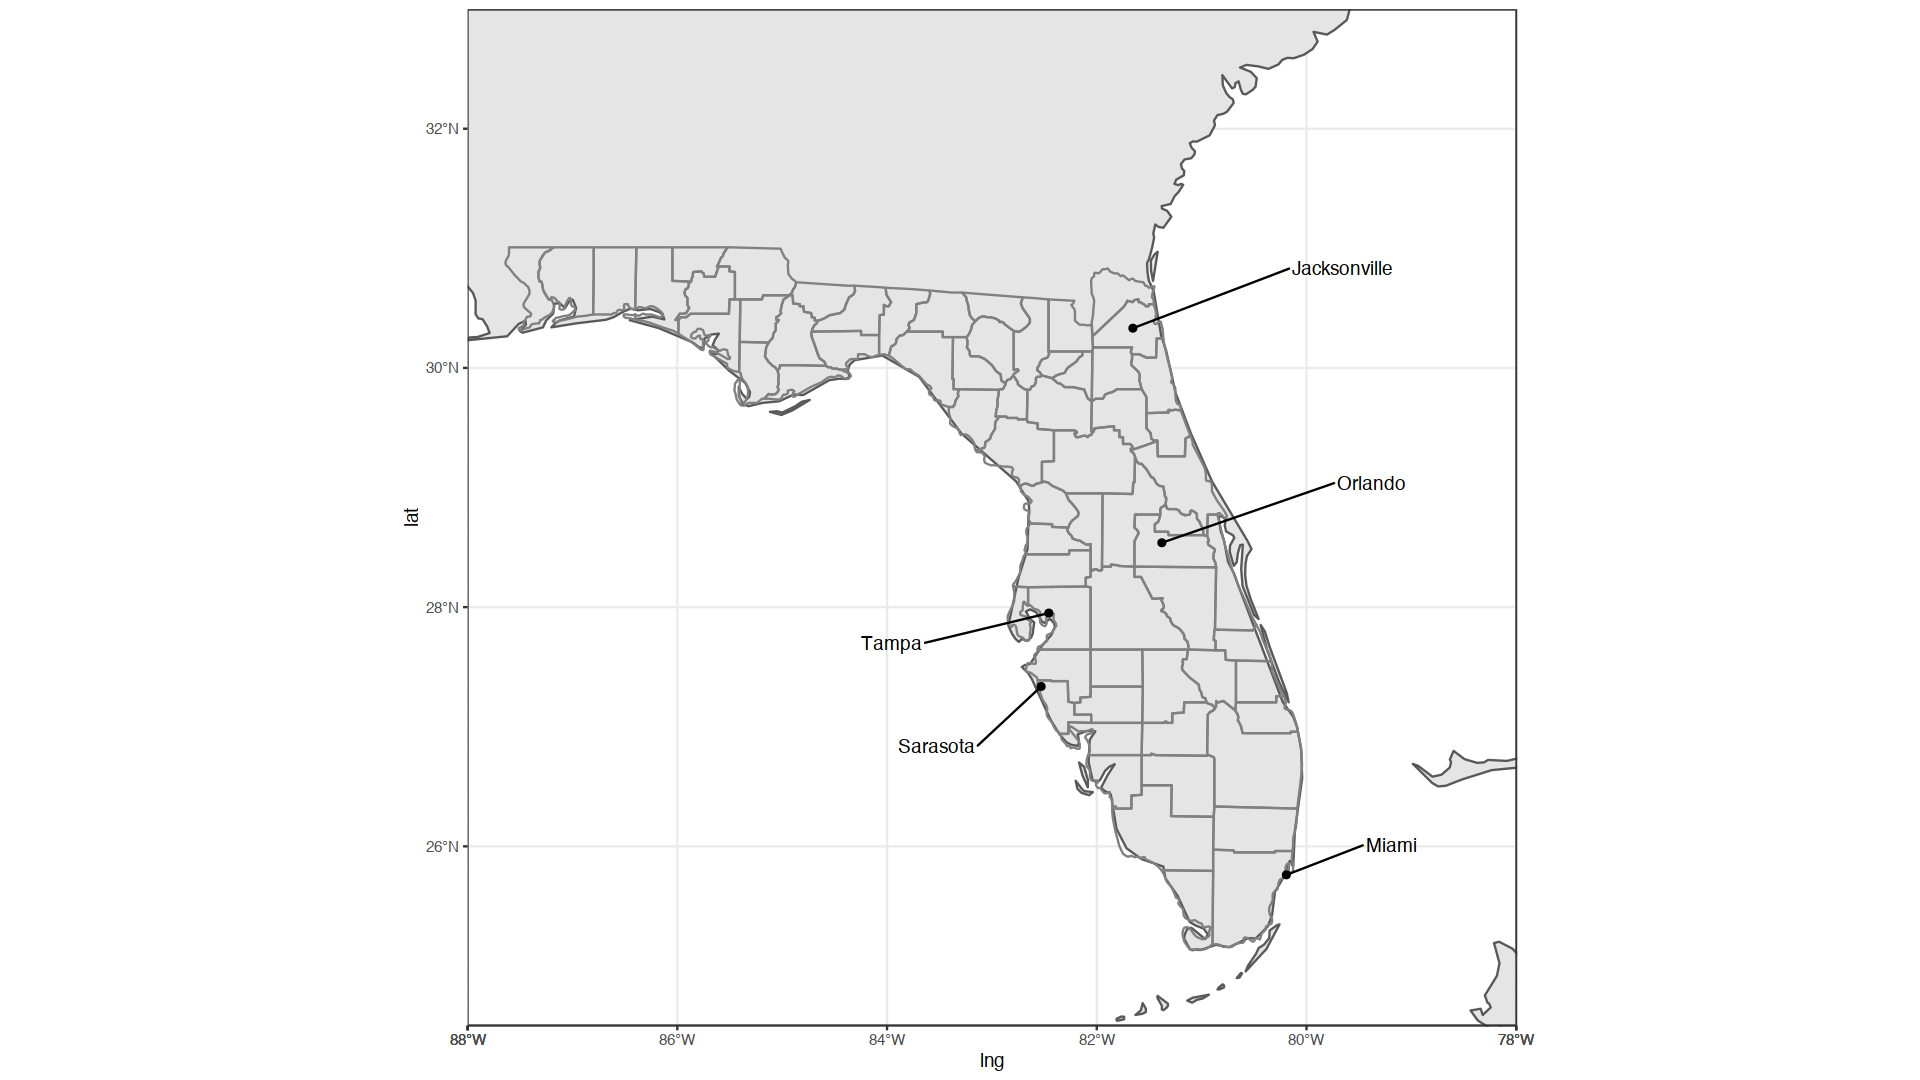

In [22]:
ggplot(data = world) +
    geom_sf() +
    geom_sf(data = counties, fill = NA, color = gray(.5)) +
    geom_sf(data = flcities) +
    geom_text_repel(data = flcities, aes(x = lng, y = lat, label = city), 
        fontface = "bold", nudge_x = c(1, -1.5, 2, 2, -1), nudge_y = c(0.25, 
            -0.25, 0.5, 0.5, -0.5)) +
    coord_sf(xlim = c(-88, -78), ylim = c(24.5, 33), expand = FALSE)

## Ostateczna mapa Florydy

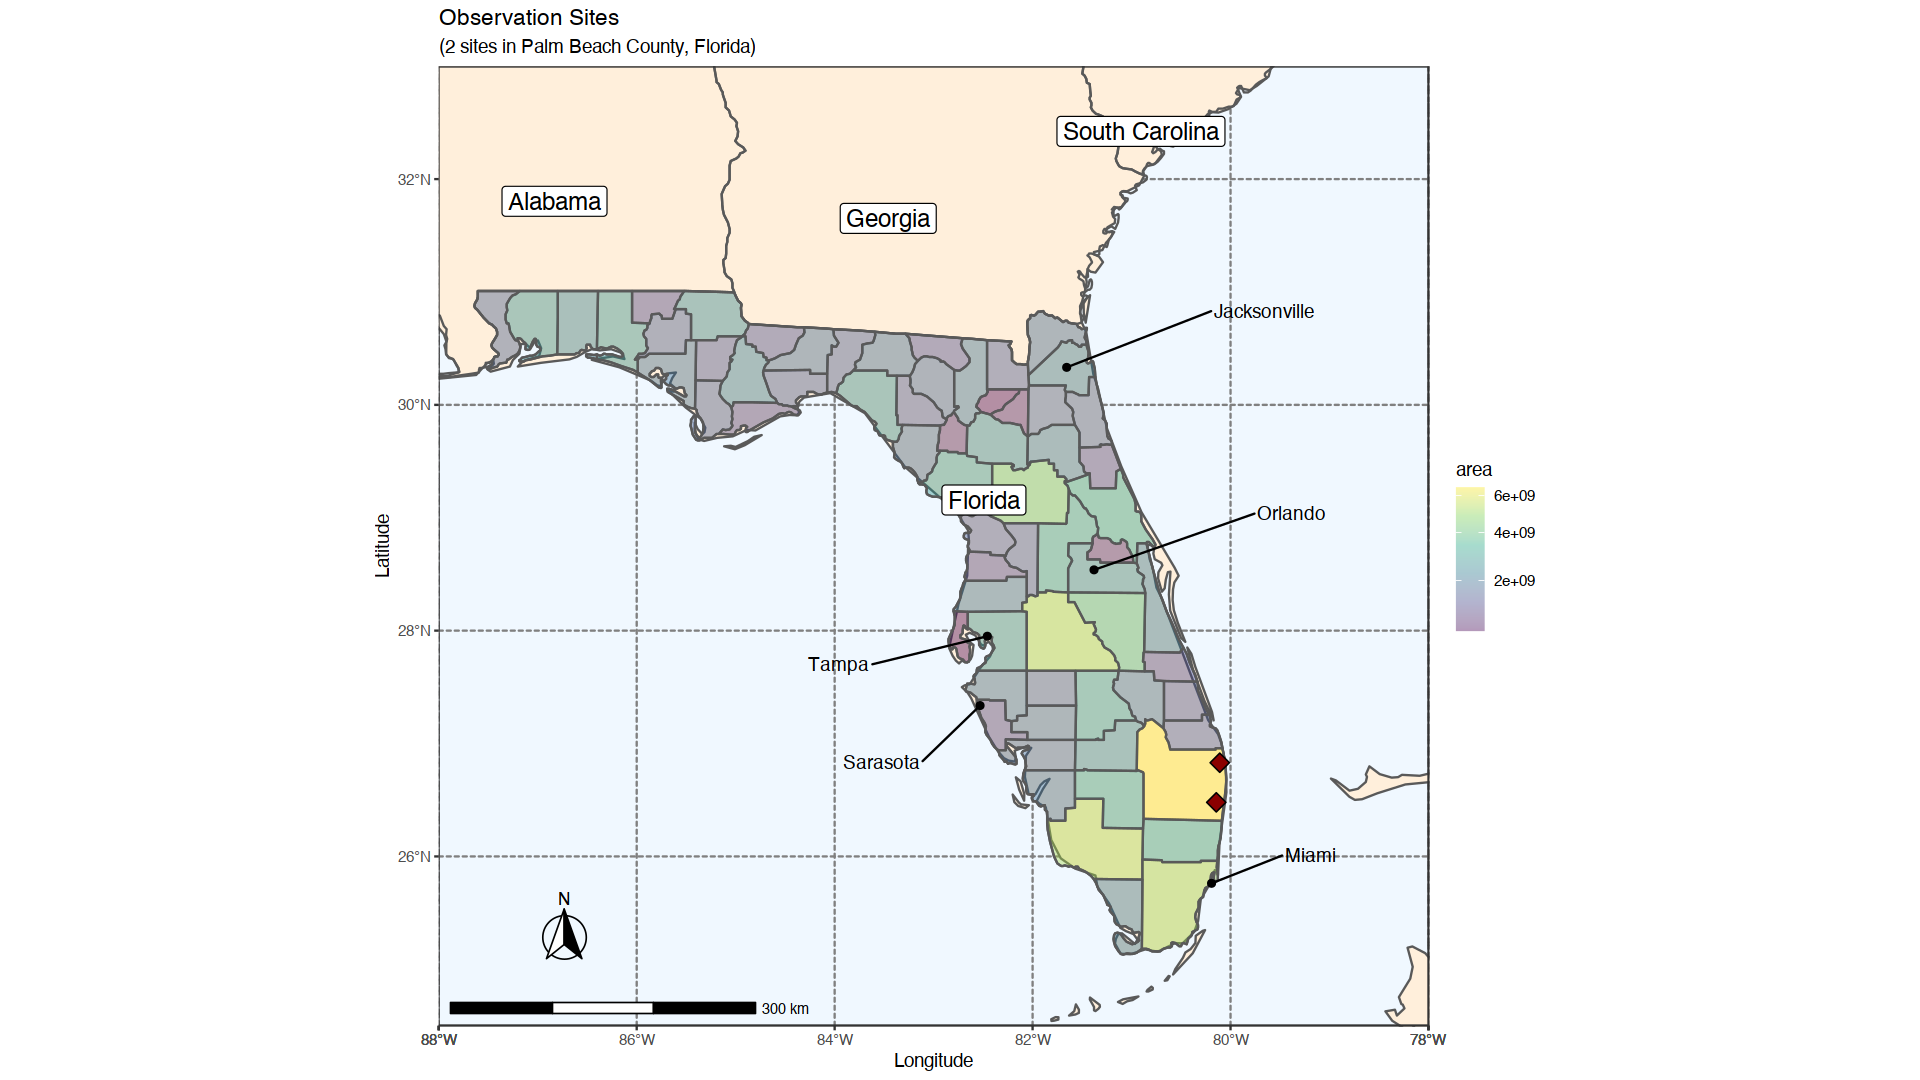

In [23]:
ggplot(data = world) +
    geom_sf(fill = "antiquewhite1") +
    geom_sf(data = counties, aes(fill = area)) +
    geom_sf(data = states, fill = NA) + 
    geom_sf(data = sites, size = 4, shape = 23, fill = "darkred") +
    geom_sf(data = flcities) +
    geom_text_repel(data = flcities, aes(x = lng, y = lat, label = city), 
        fontface = "bold", nudge_x = c(1, -1.5, 2, 2, -1), nudge_y = c(0.25, 
            -0.25, 0.5, 0.5, -0.5)) +
    geom_label(data = states, aes(X, Y, label = ID), size = 5, fontface = "bold", 
        nudge_y = states$nudge_y) +
    scale_fill_viridis_c(trans = "sqrt", alpha = .4) +
    annotation_scale(location = "bl", width_hint = 0.4) +
    annotation_north_arrow(location = "bl", which_north = "true", 
        pad_x = unit(0.75, "in"), pad_y = unit(0.5, "in"),
        style = north_arrow_fancy_orienteering) +
    coord_sf(xlim = c(-88, -78), ylim = c(24.5, 33), expand = FALSE) +
    xlab("Longitude") + ylab("Latitude") +
    ggtitle("Observation Sites", subtitle = "(2 sites in Palm Beach County, Florida)") +
    theme(panel.grid.major = element_line(color = gray(0.5), linetype = "dashed", 
        size = 0.5), panel.background = element_rect(fill = "aliceblue"))

## Klika map obok siebie

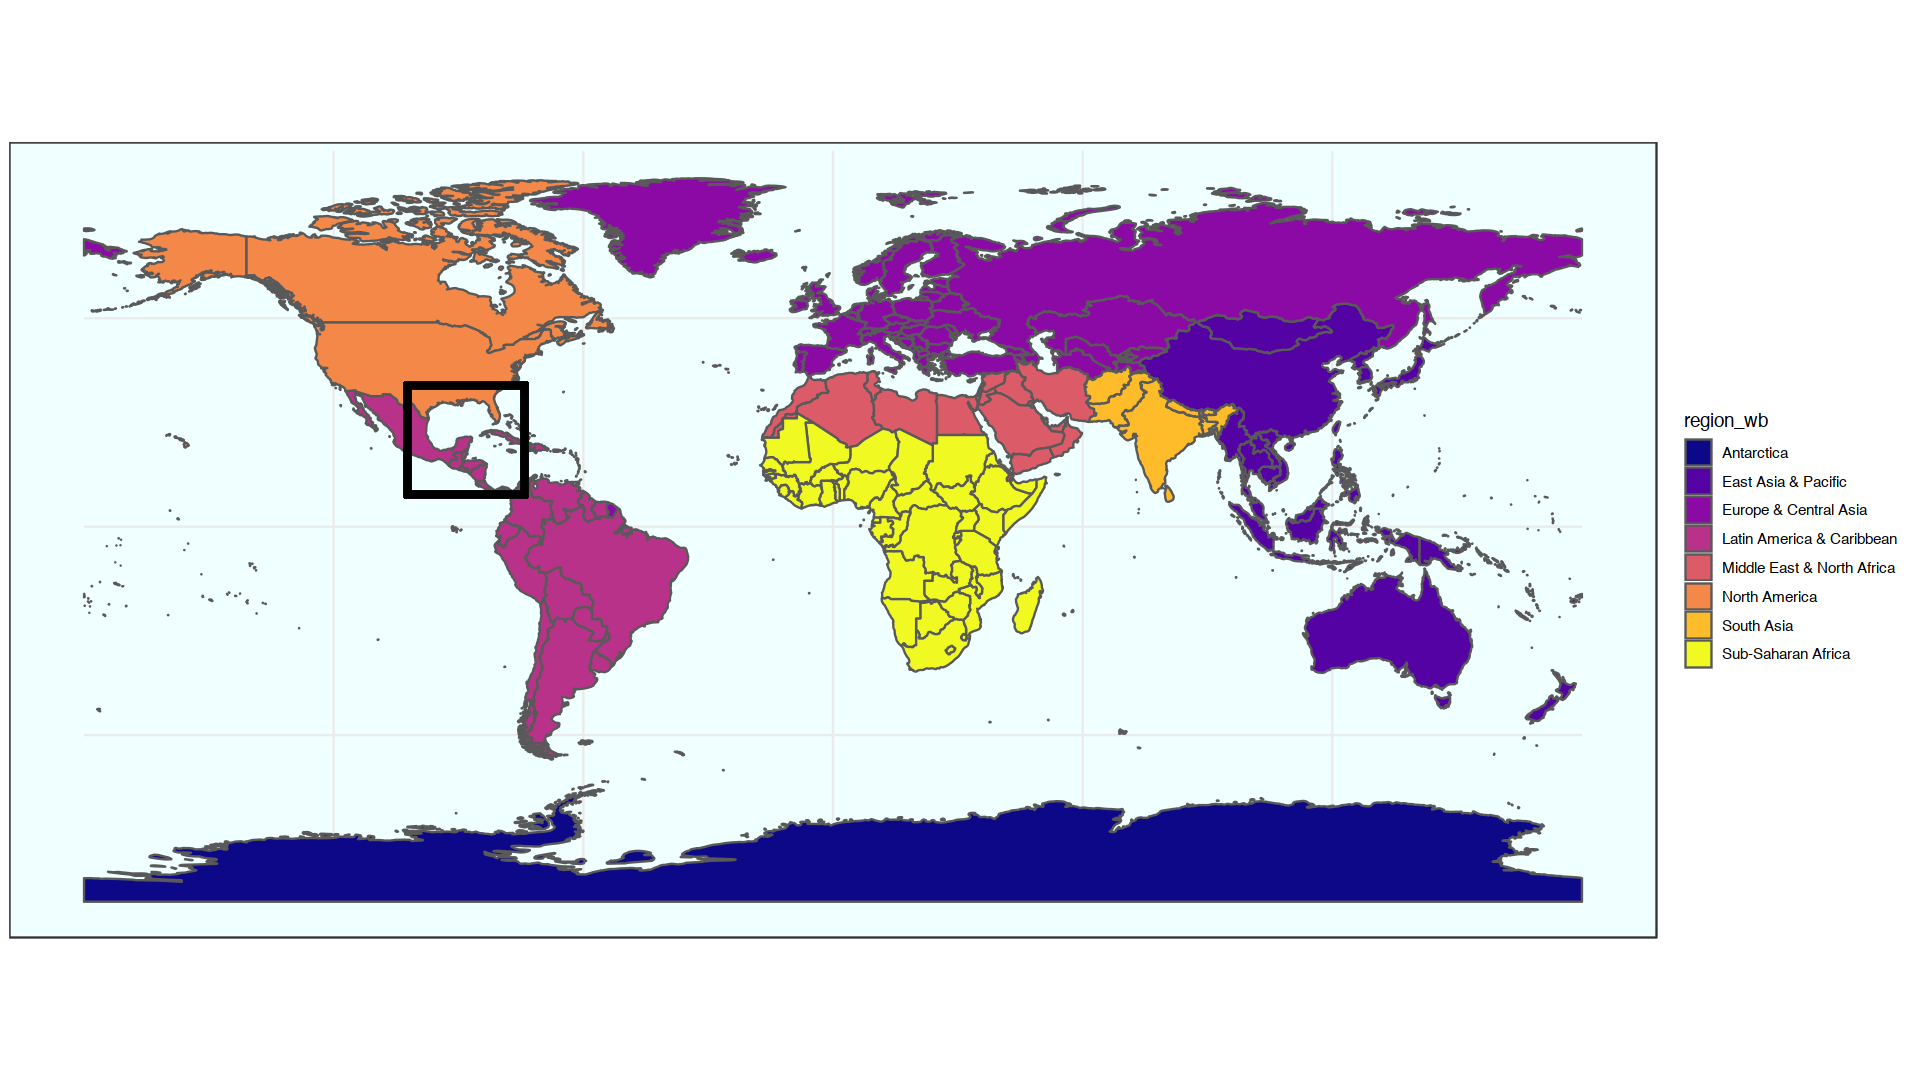

In [24]:
(gworld <- ggplot(data = world) +
  geom_sf(aes(fill = region_wb)) +
  geom_rect(xmin = -102.15, xmax = -74.12, ymin = 7.65, ymax = 33.97, 
     fill = NA, colour = "black", size = 1.5) +
  scale_fill_viridis_d(option = "plasma") +
  theme(panel.background = element_rect(fill = "azure"),
     panel.border = element_rect(fill = NA))) # 1. map

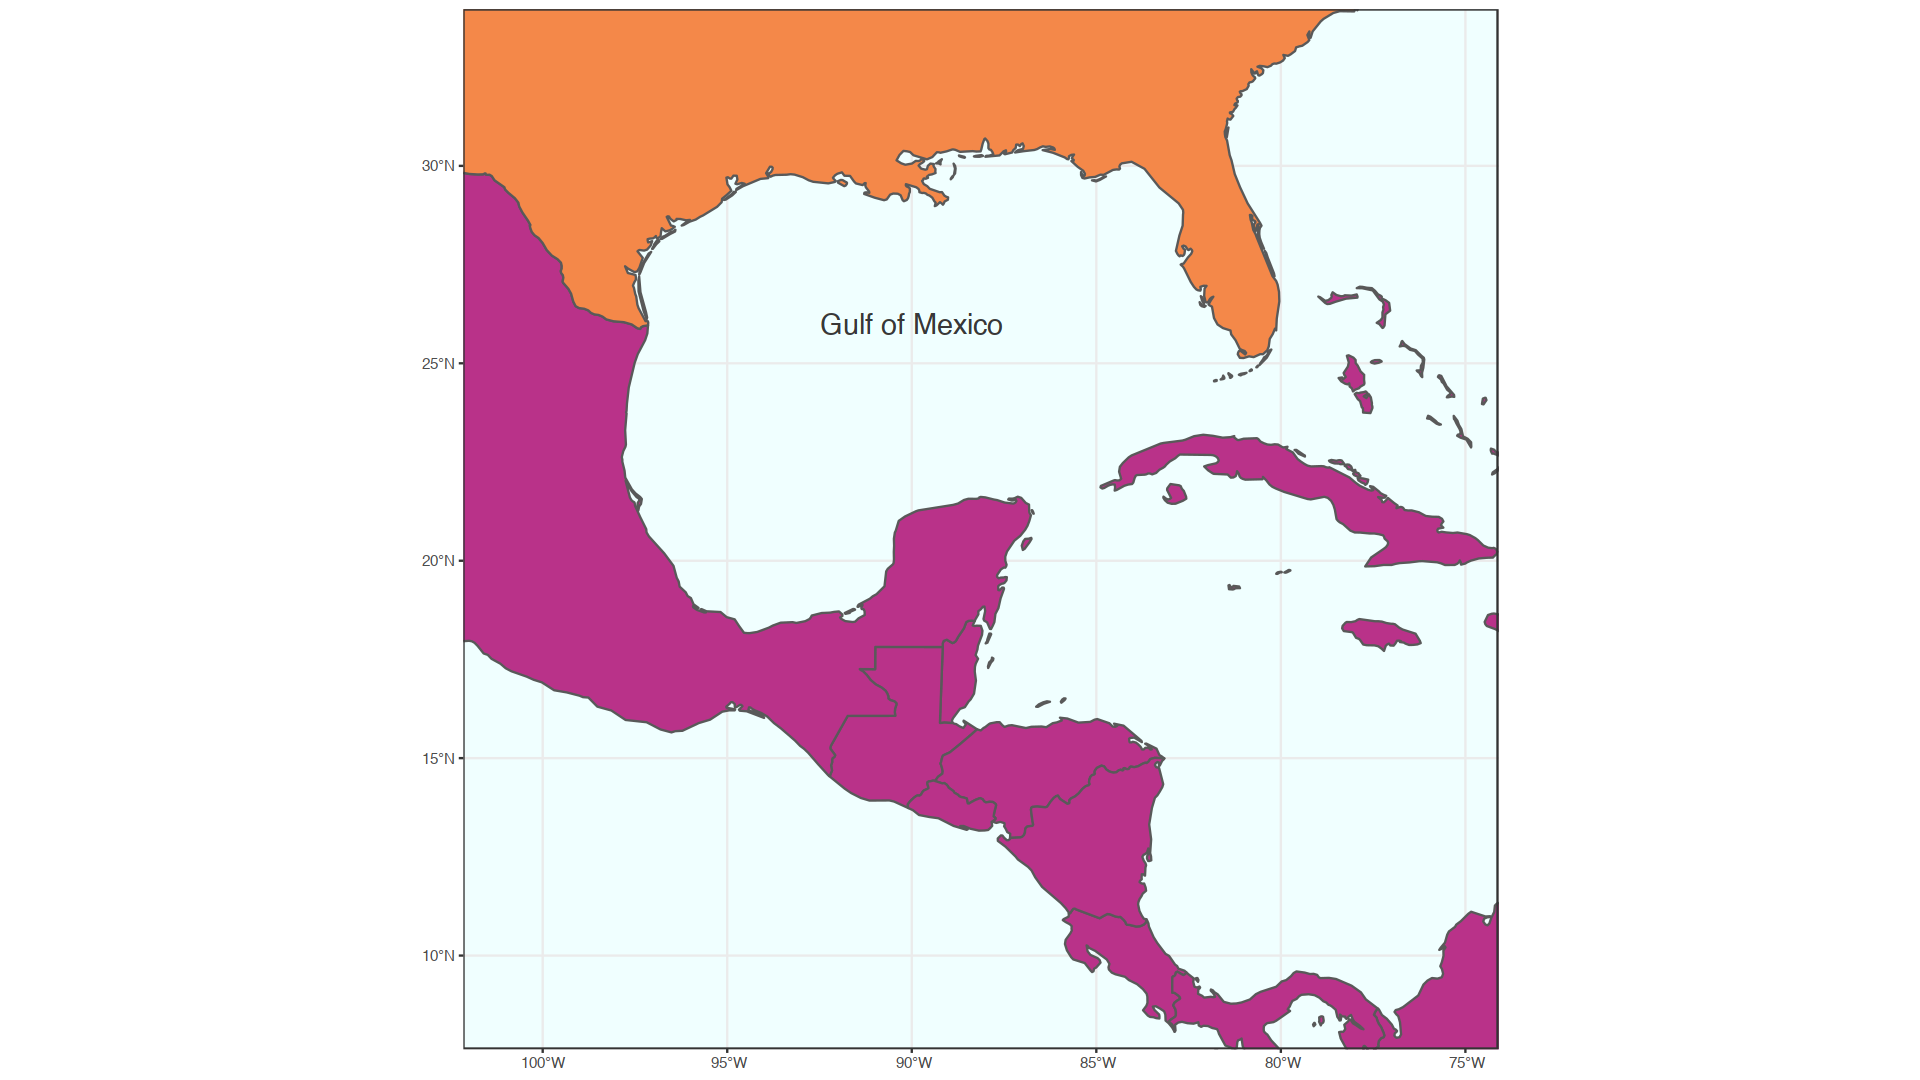

In [25]:
(ggulf <- ggplot(data = world) +
  geom_sf(aes(fill = region_wb)) +
  annotate(geom = "text", x = -90, y = 26, label = "Gulf of Mexico", 
     fontface = "italic", color = "grey22", size = 6) +
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97), expand = FALSE) +
  scale_fill_viridis_d(option = "plasma") +
  theme(legend.position = "none", axis.title.x = element_blank(), 
     axis.title.y = element_blank(), panel.background = element_rect(fill = "azure"), 
     panel.border = element_rect(fill = NA))) # 2. map

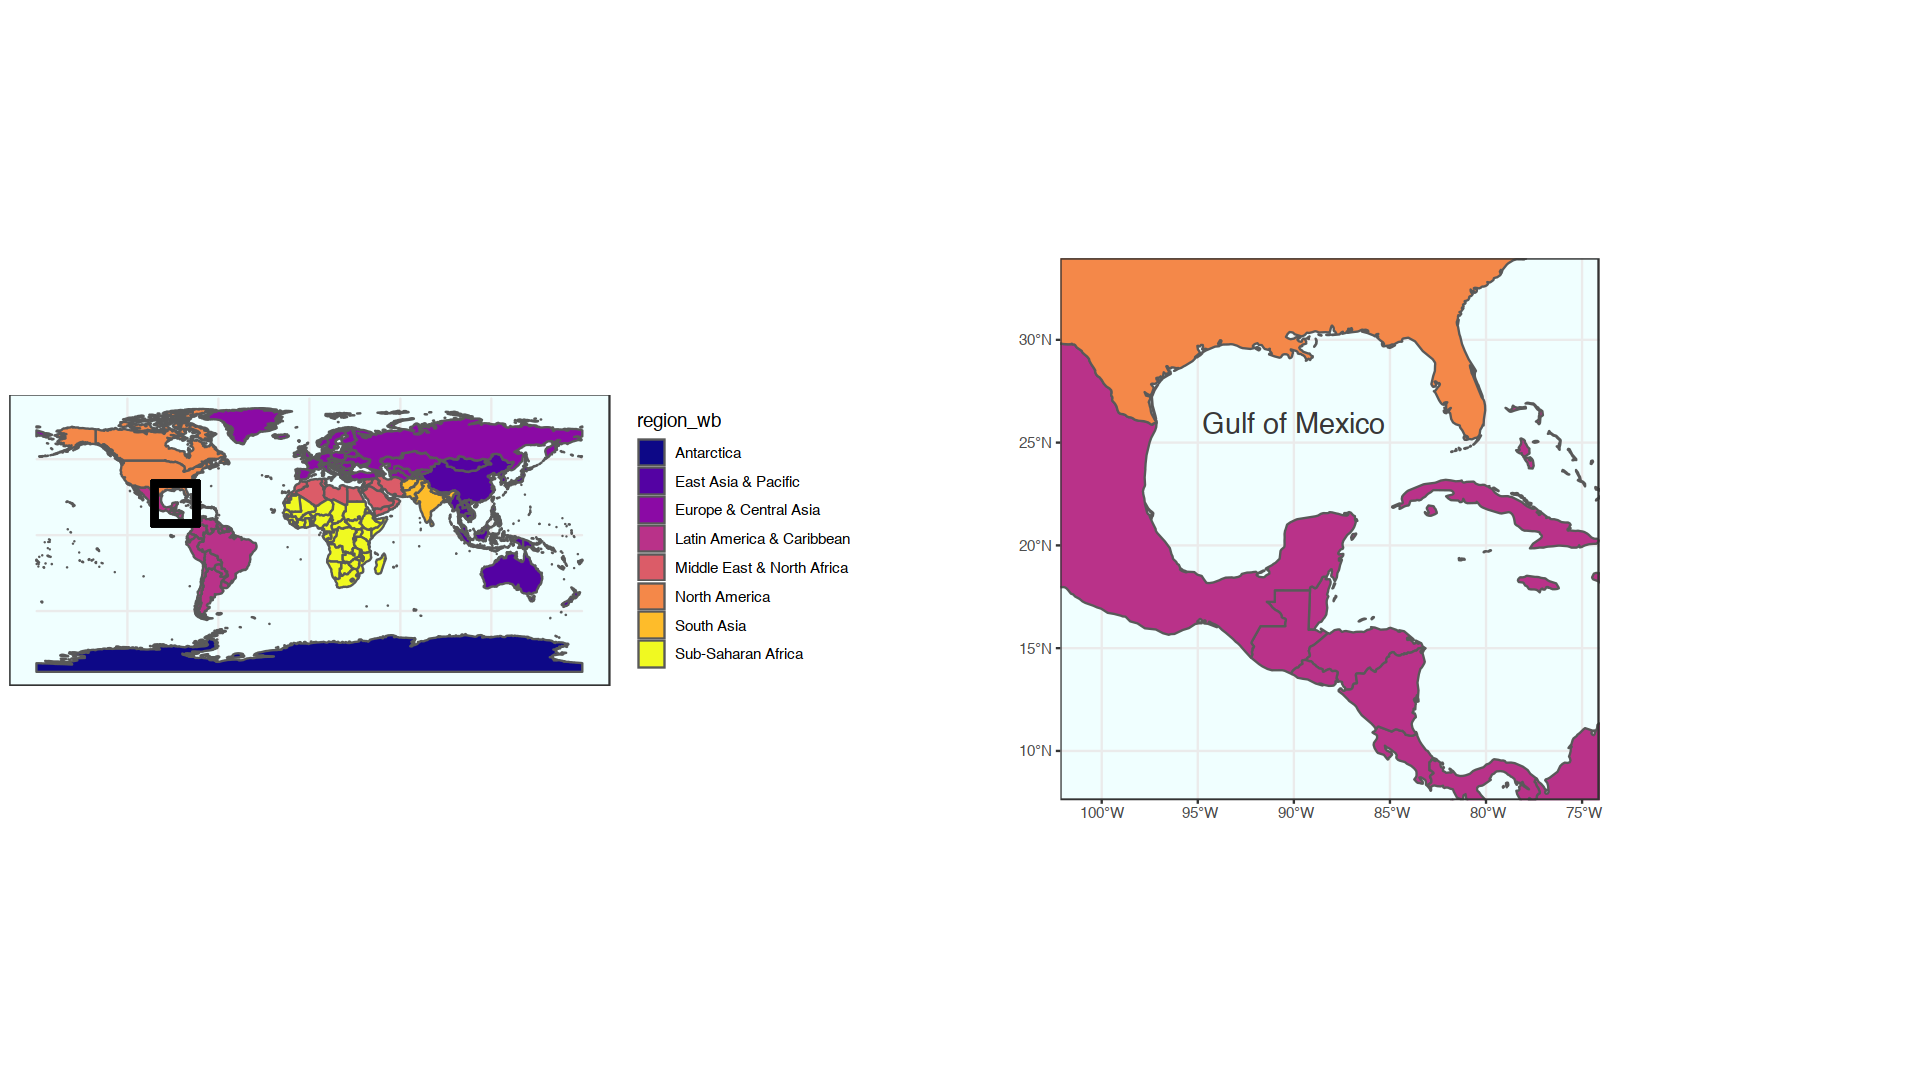

In [26]:
ggplot() +
    coord_equal(xlim = c(0, 3.3), ylim = c(0, 1), expand = FALSE) +
    annotation_custom(ggplotGrob(gworld), xmin = 0, xmax = 1.5, ymin = 0, 
                    ymax = 1) +
    annotation_custom(ggplotGrob(ggulf), xmin = 1.5, xmax = 3, ymin = 0, 
                    ymax = 1) +
    theme_void() # 1. solution

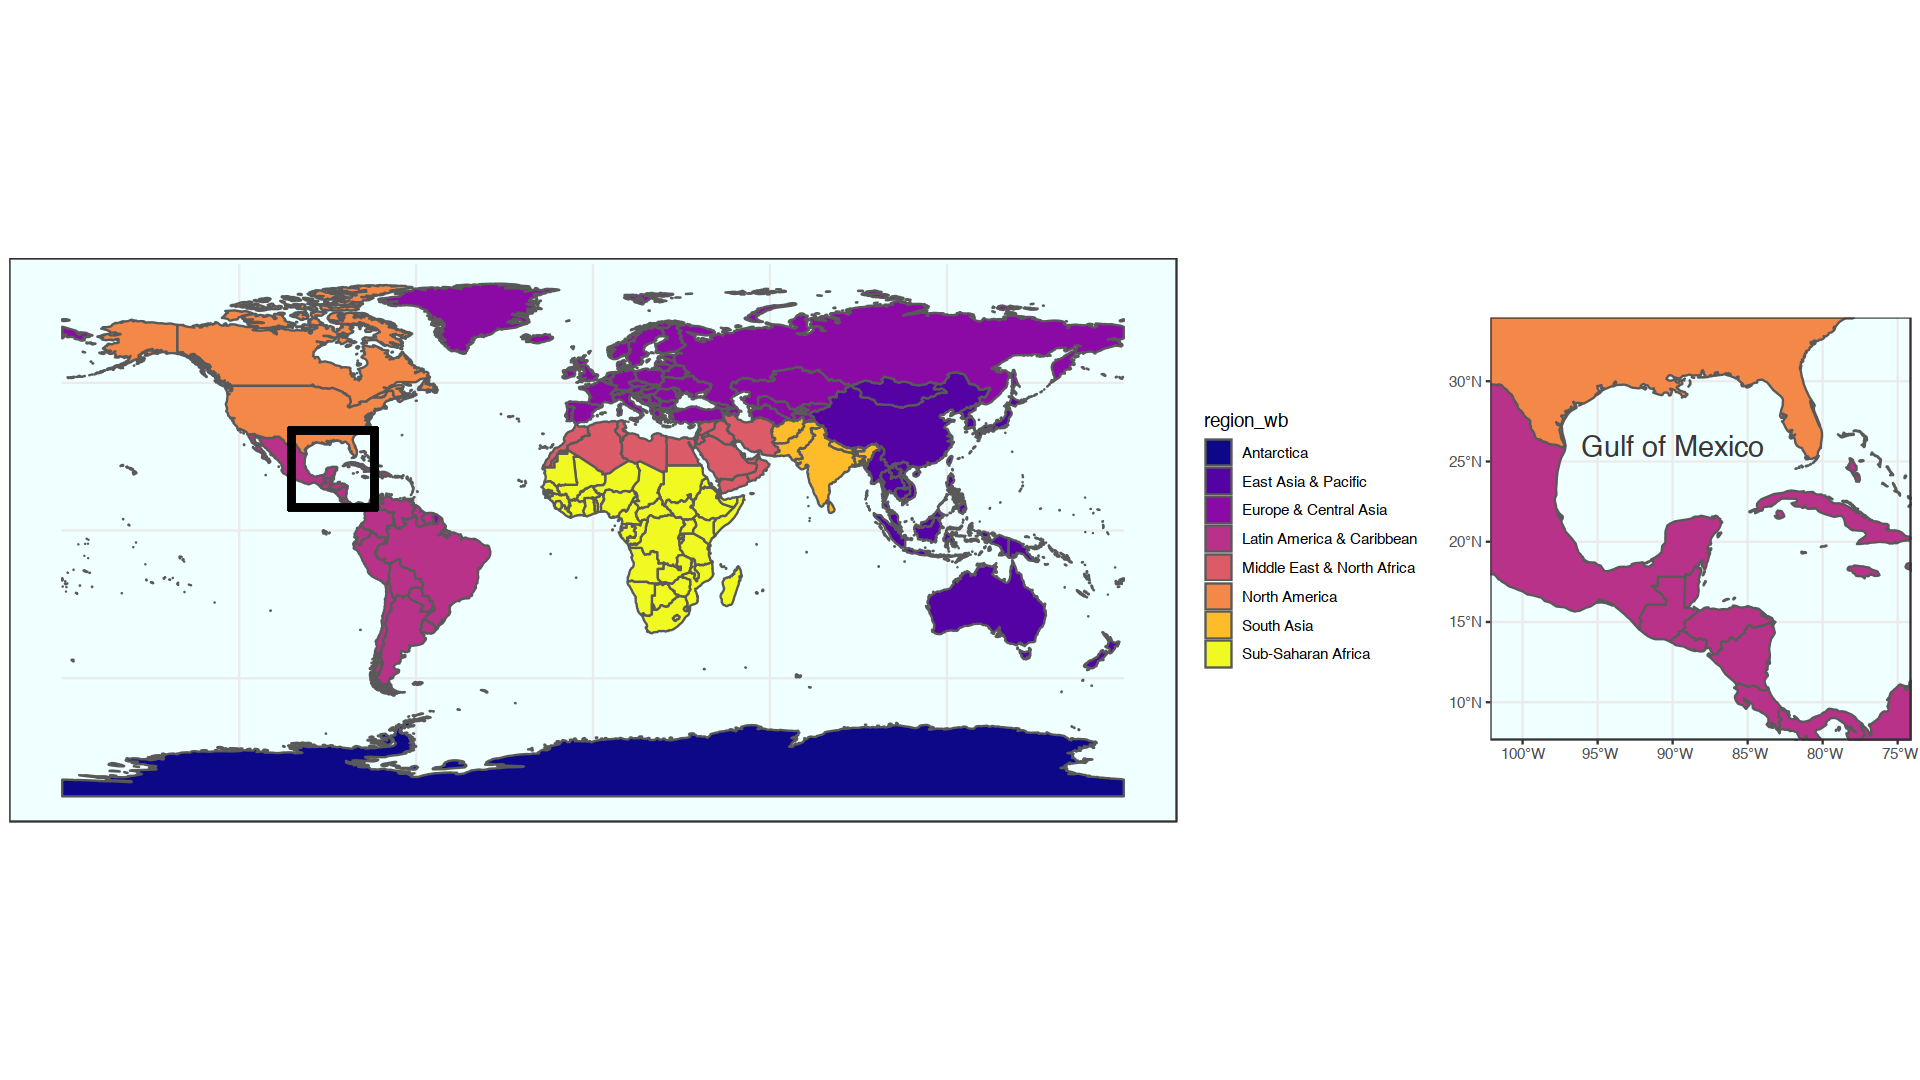

In [27]:
plot_grid(gworld, ggulf, nrow = 1, rel_widths = c(3, 1)) # 2. solution

## Wstawki na mapach

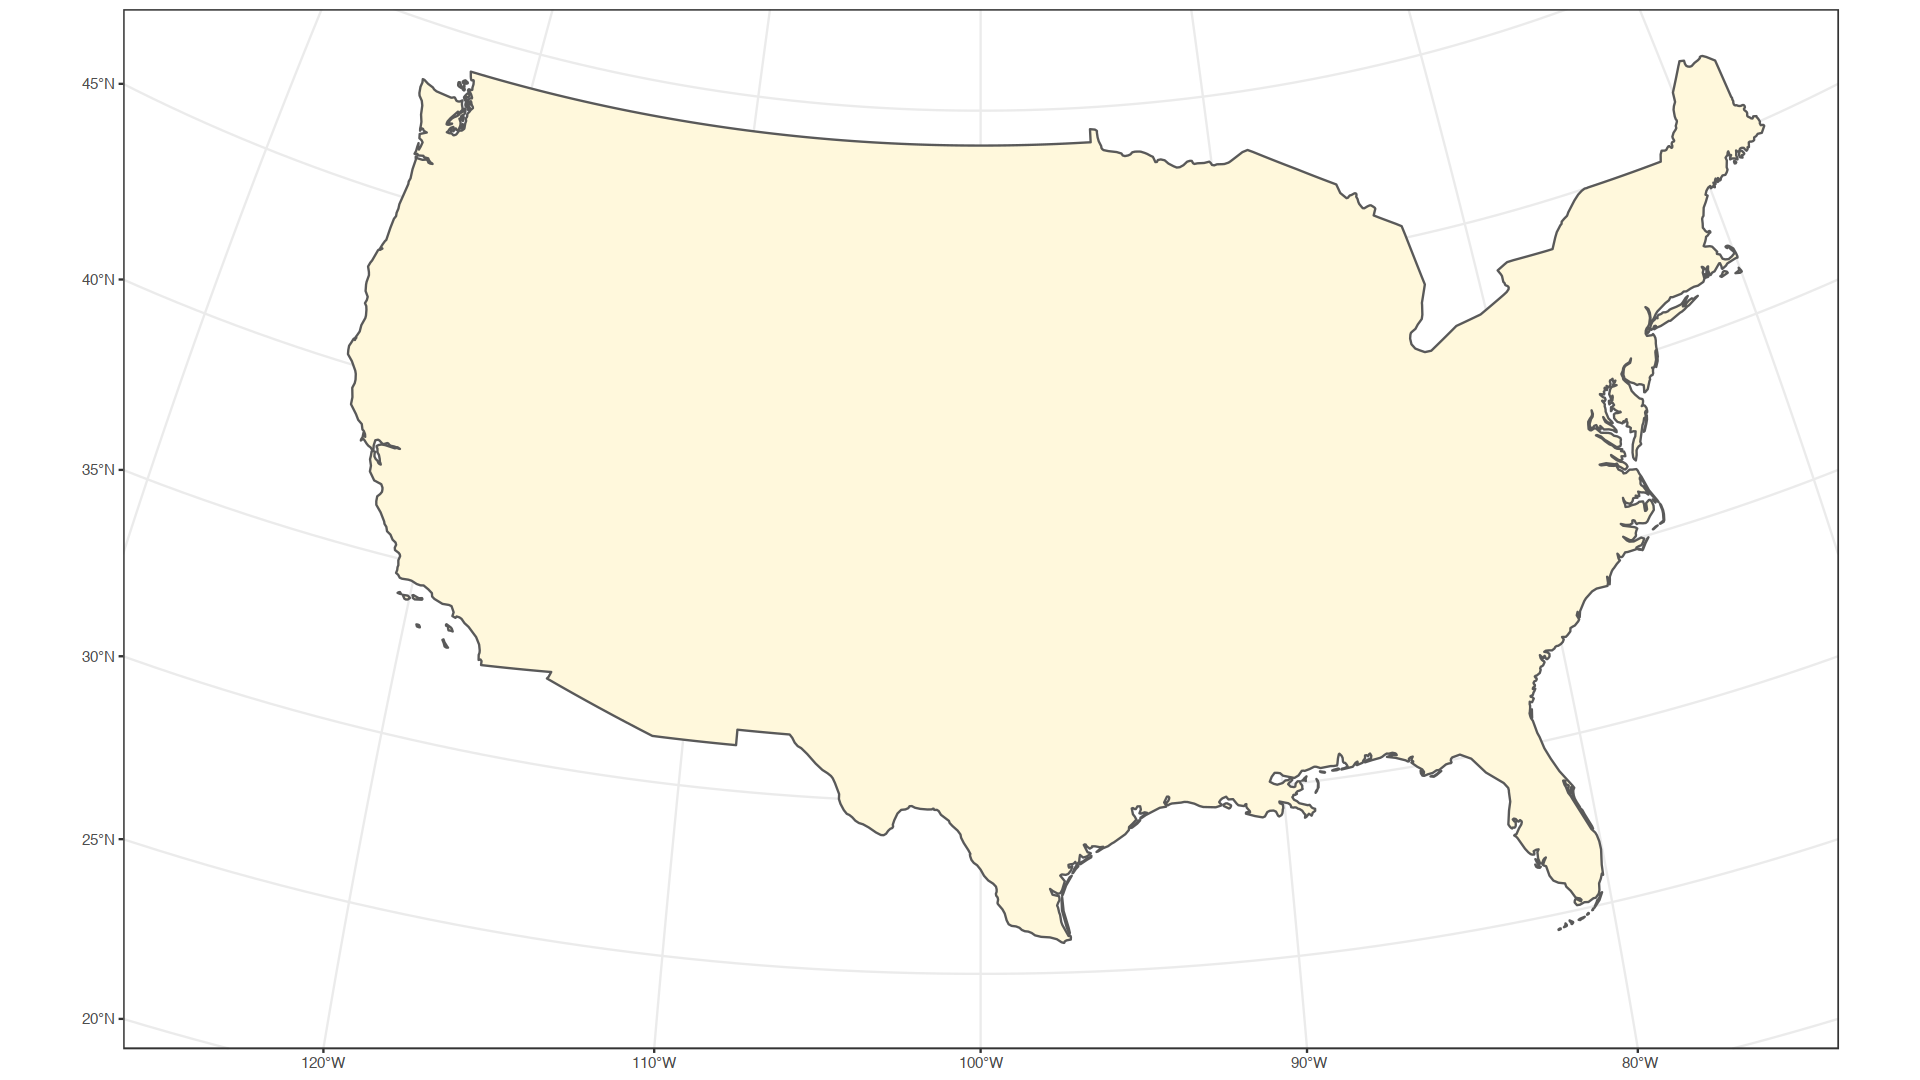

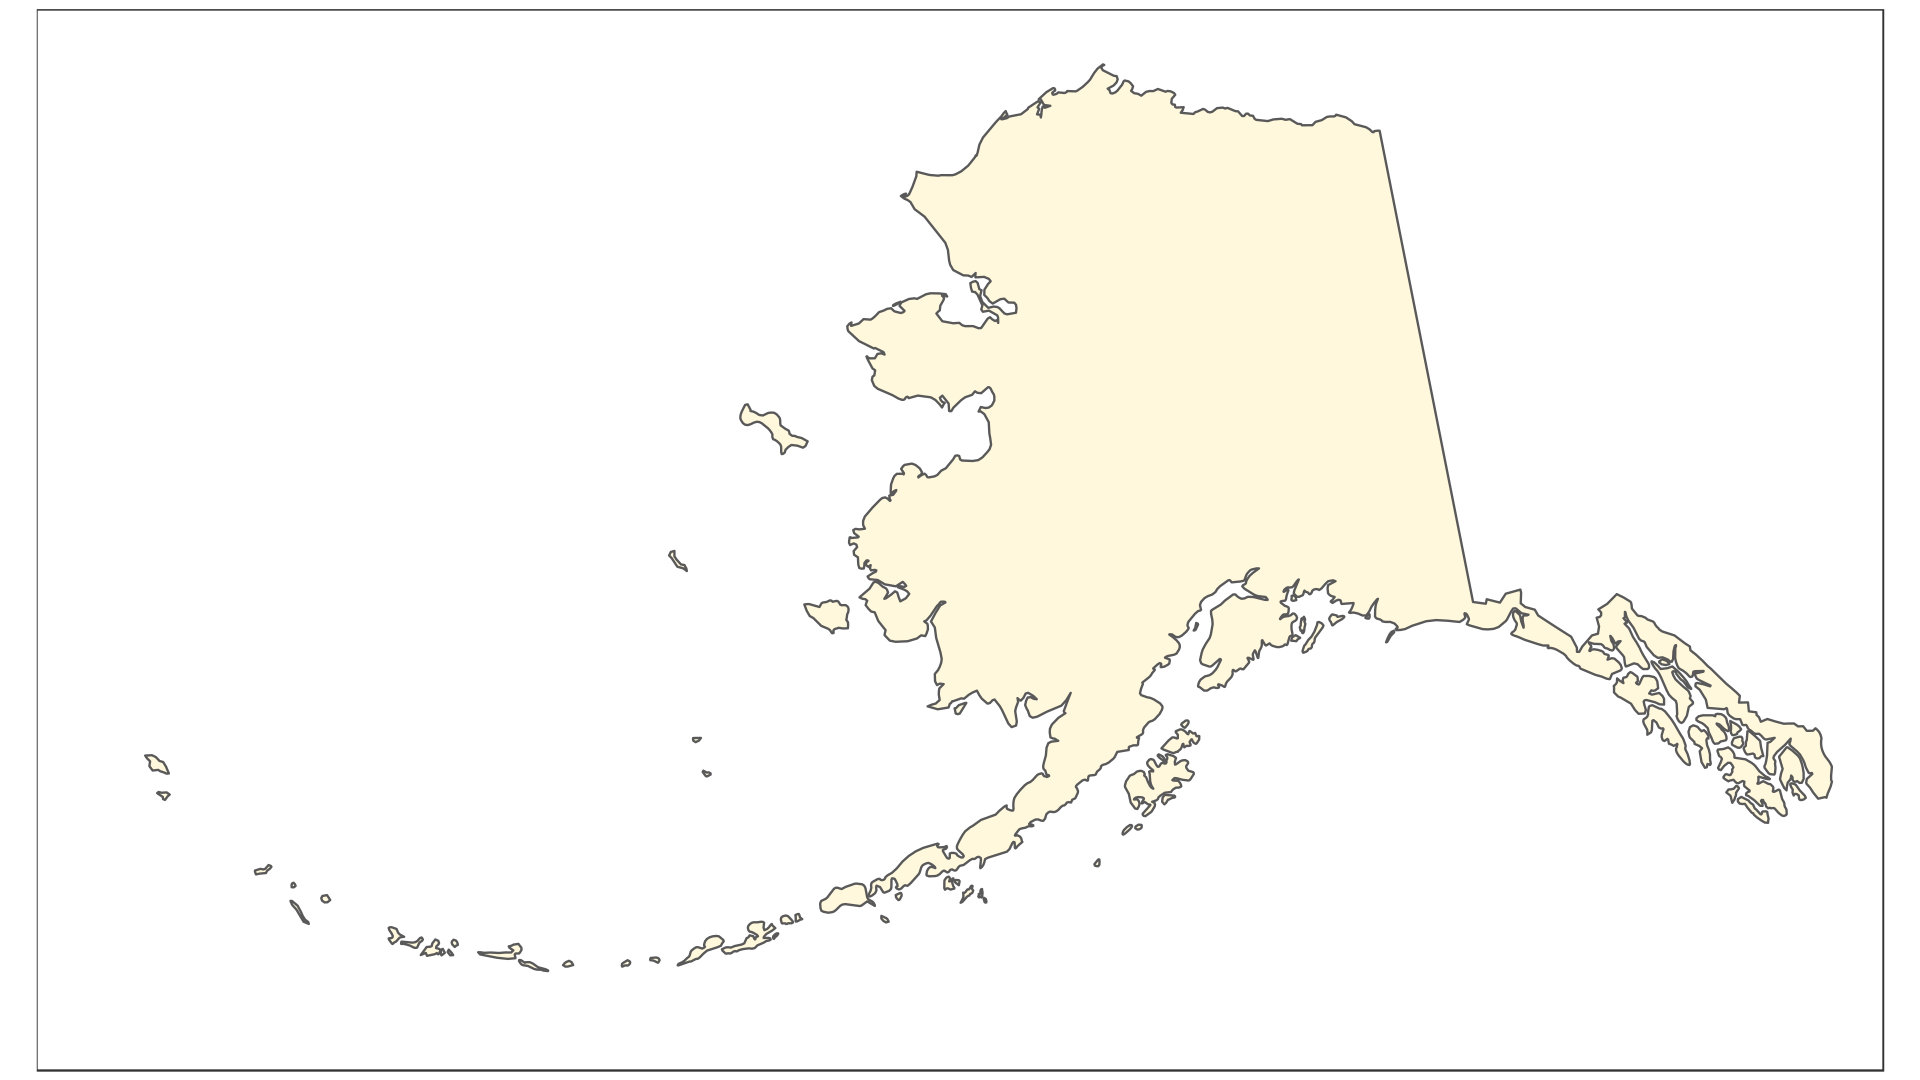

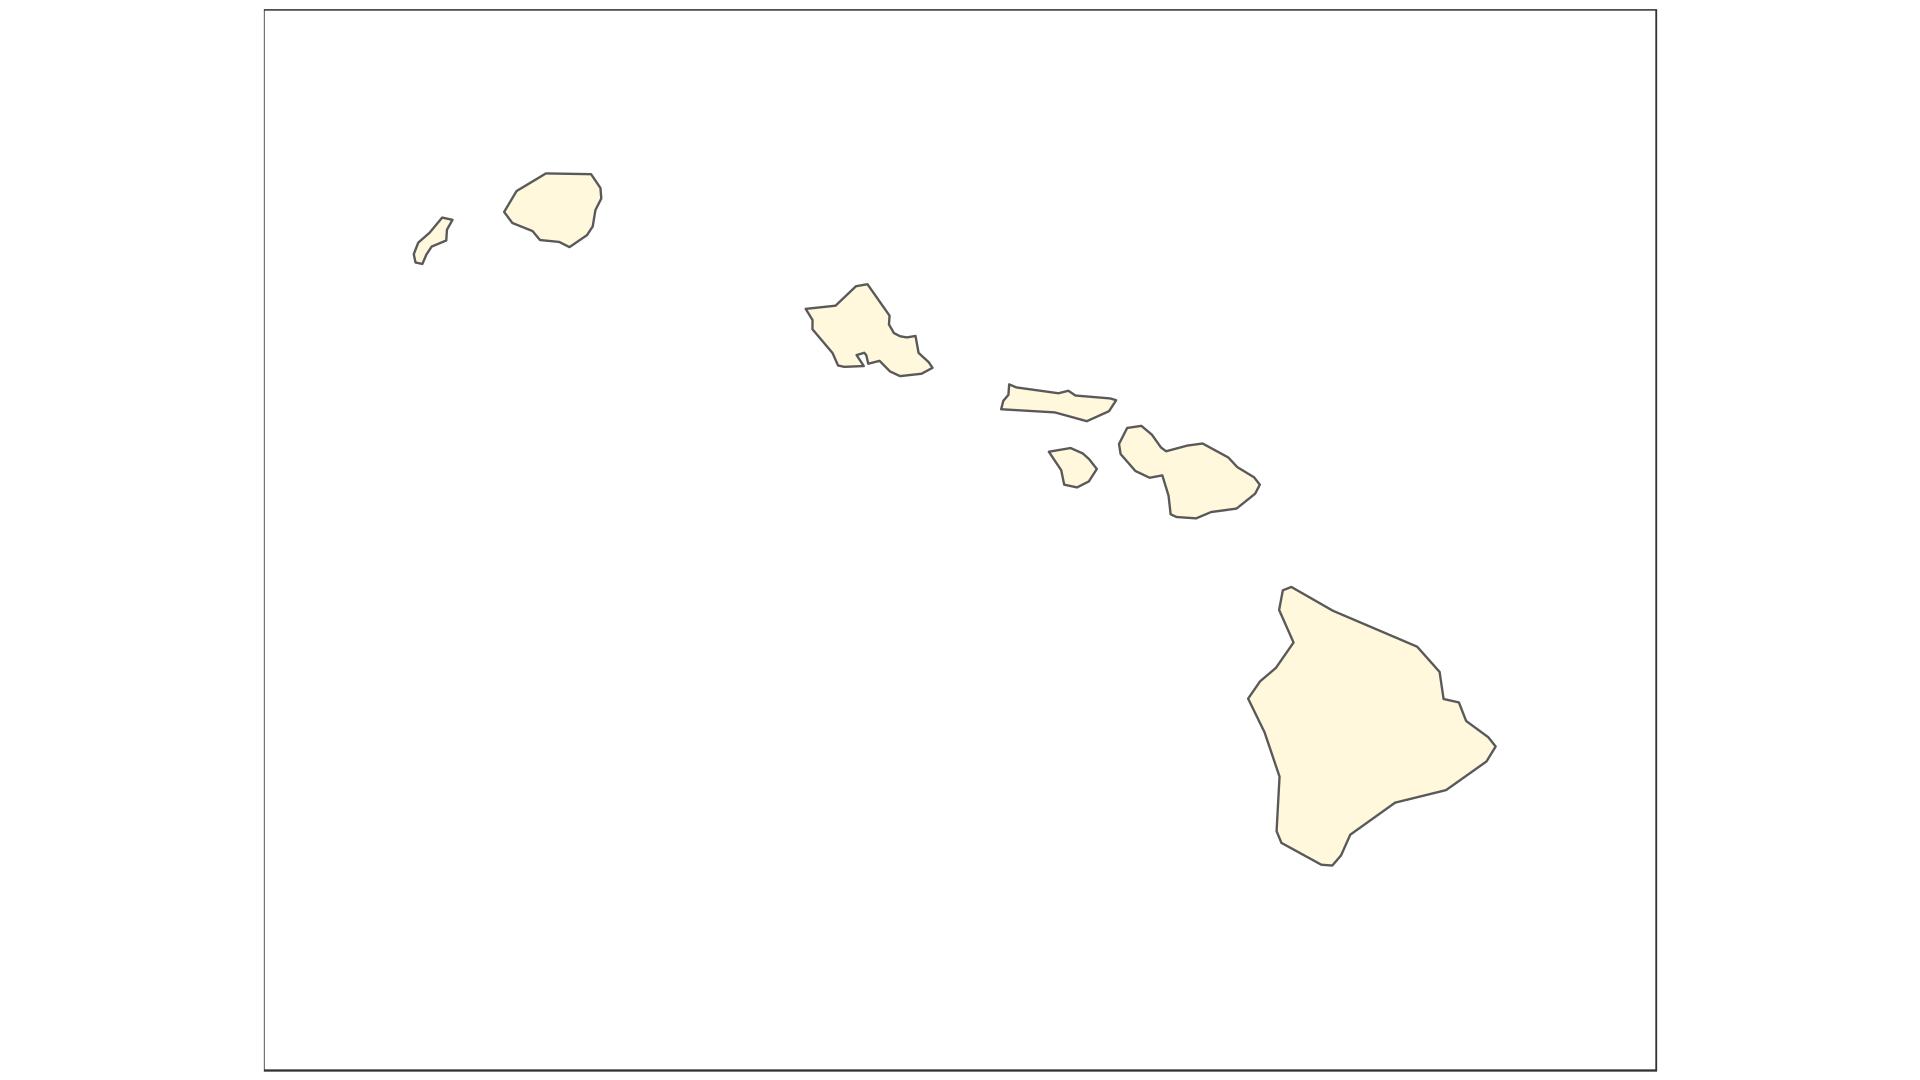

In [28]:
usa <- subset(world, admin == "United States of America")
(mainland <- ggplot(data = usa) +
     geom_sf(fill = "cornsilk") +
     coord_sf(crs = st_crs(2163), xlim = c(-2500000, 2500000), ylim = c(-2300000, 
         730000)))

(alaska <- ggplot(data = usa) +
     geom_sf(fill = "cornsilk") +
     coord_sf(crs = st_crs(3467), xlim = c(-2400000, 1600000), ylim = c(200000, 
         2500000), expand = FALSE, datum = NA))

(hawaii  <- ggplot(data = usa) +
     geom_sf(fill = "cornsilk") +
     coord_sf(crs = st_crs(4135), xlim = c(-161, -154), ylim = c(18, 
         23), expand = FALSE, datum = NA))

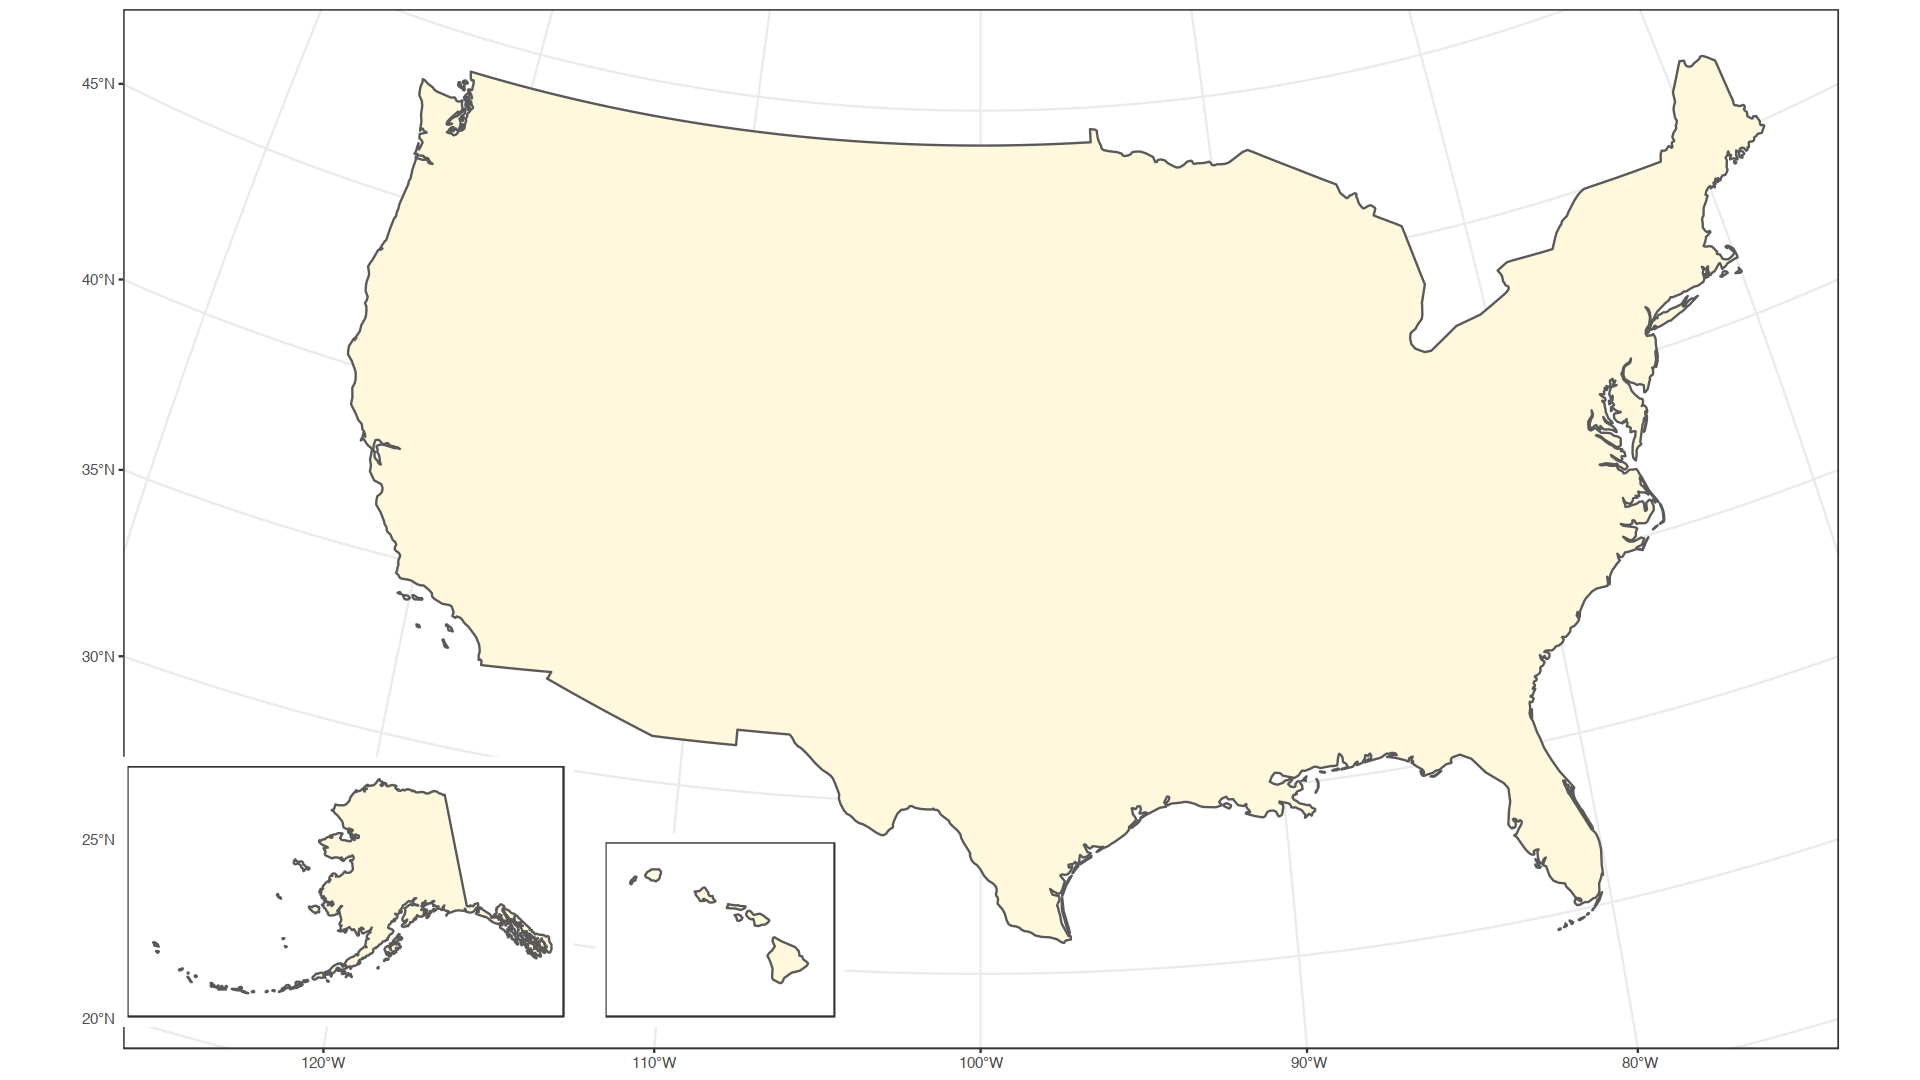

In [29]:
ratioAlaska <- (2500000 - 200000) / (1600000 - (-2400000)) # [1] 0.575
ratioHawaii  <- (23 - 18) / (-154 - (-161)) # [1] 0.7142857

ggdraw(mainland) +
    draw_plot(alaska, width = 0.26, height = 0.26 * 10/6 * ratioAlaska, 
        x = 0.05, y = 0.05) +
    draw_plot(hawaii, width = 0.15, height = 0.15 * 10/6 * ratioHawaii, 
        x = 0.3, y = 0.05)

## Mapy ze strzłkami do zbliżeń

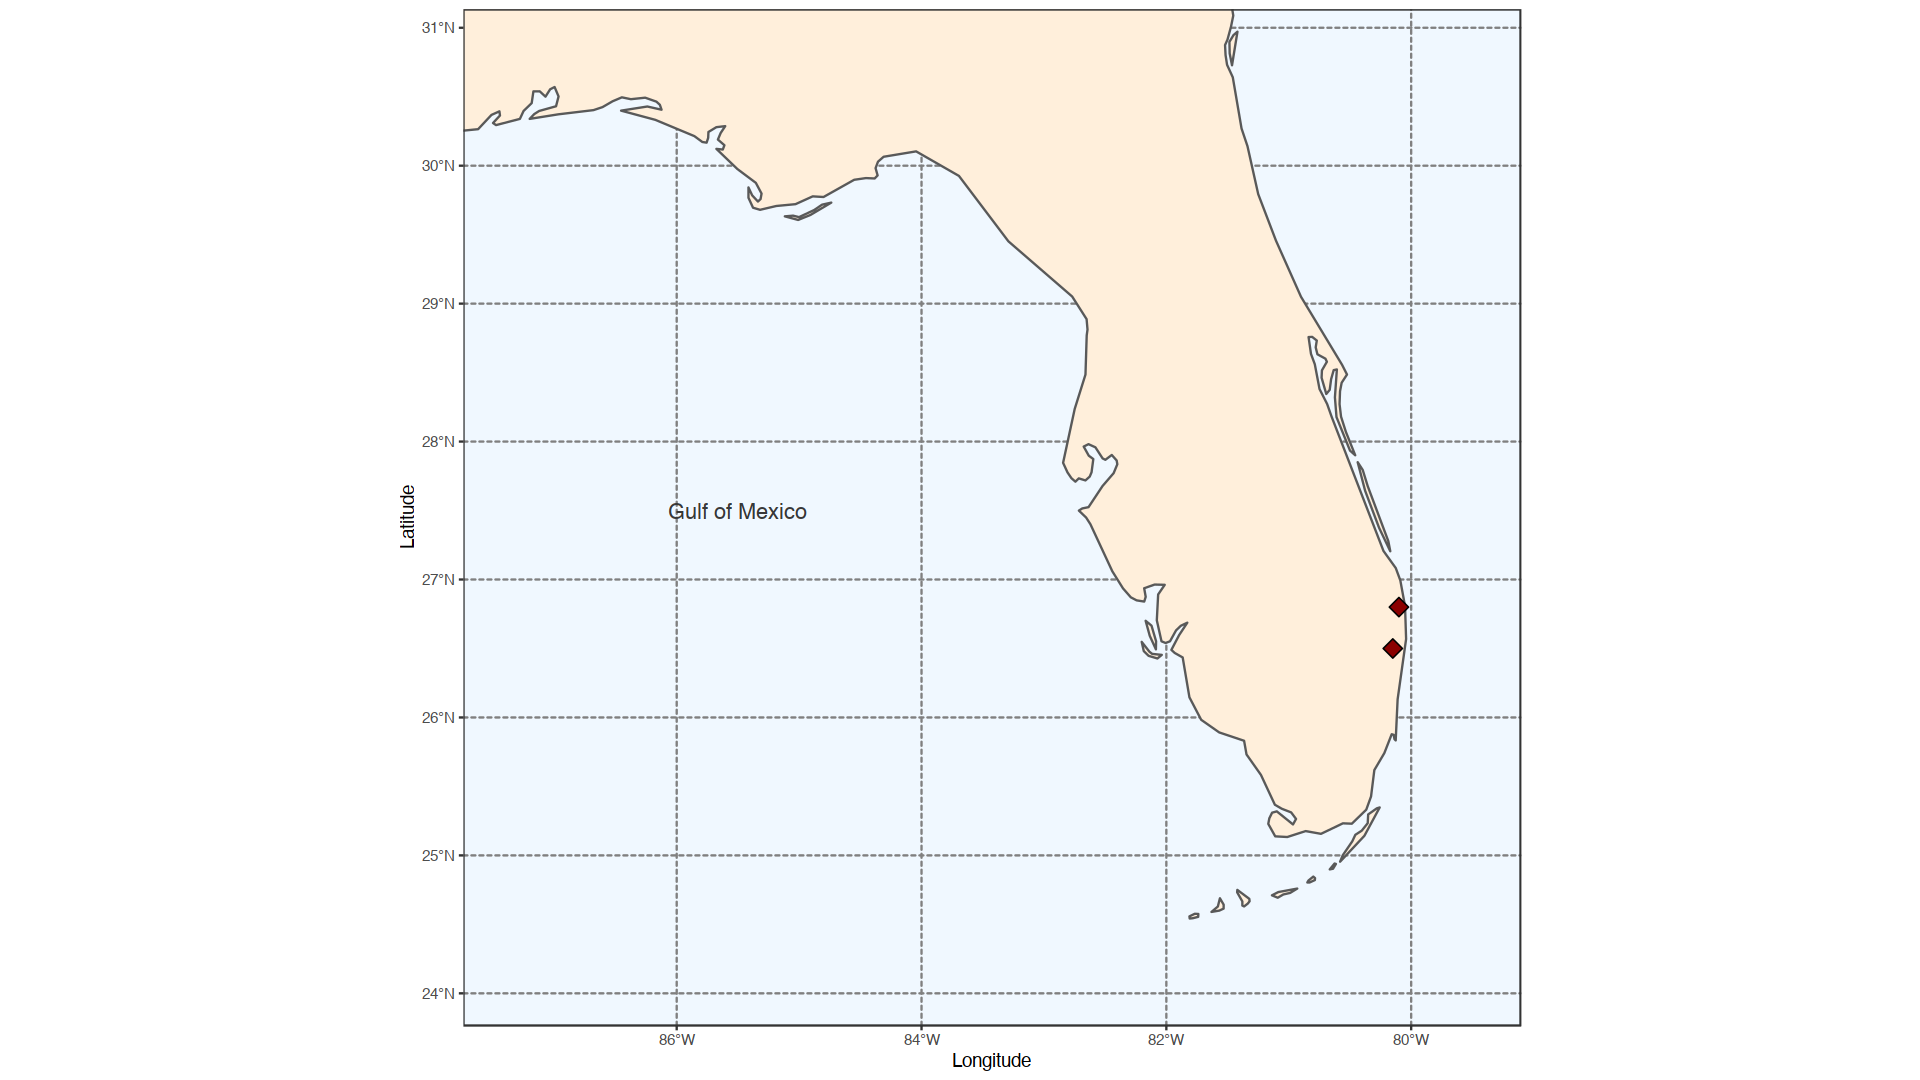

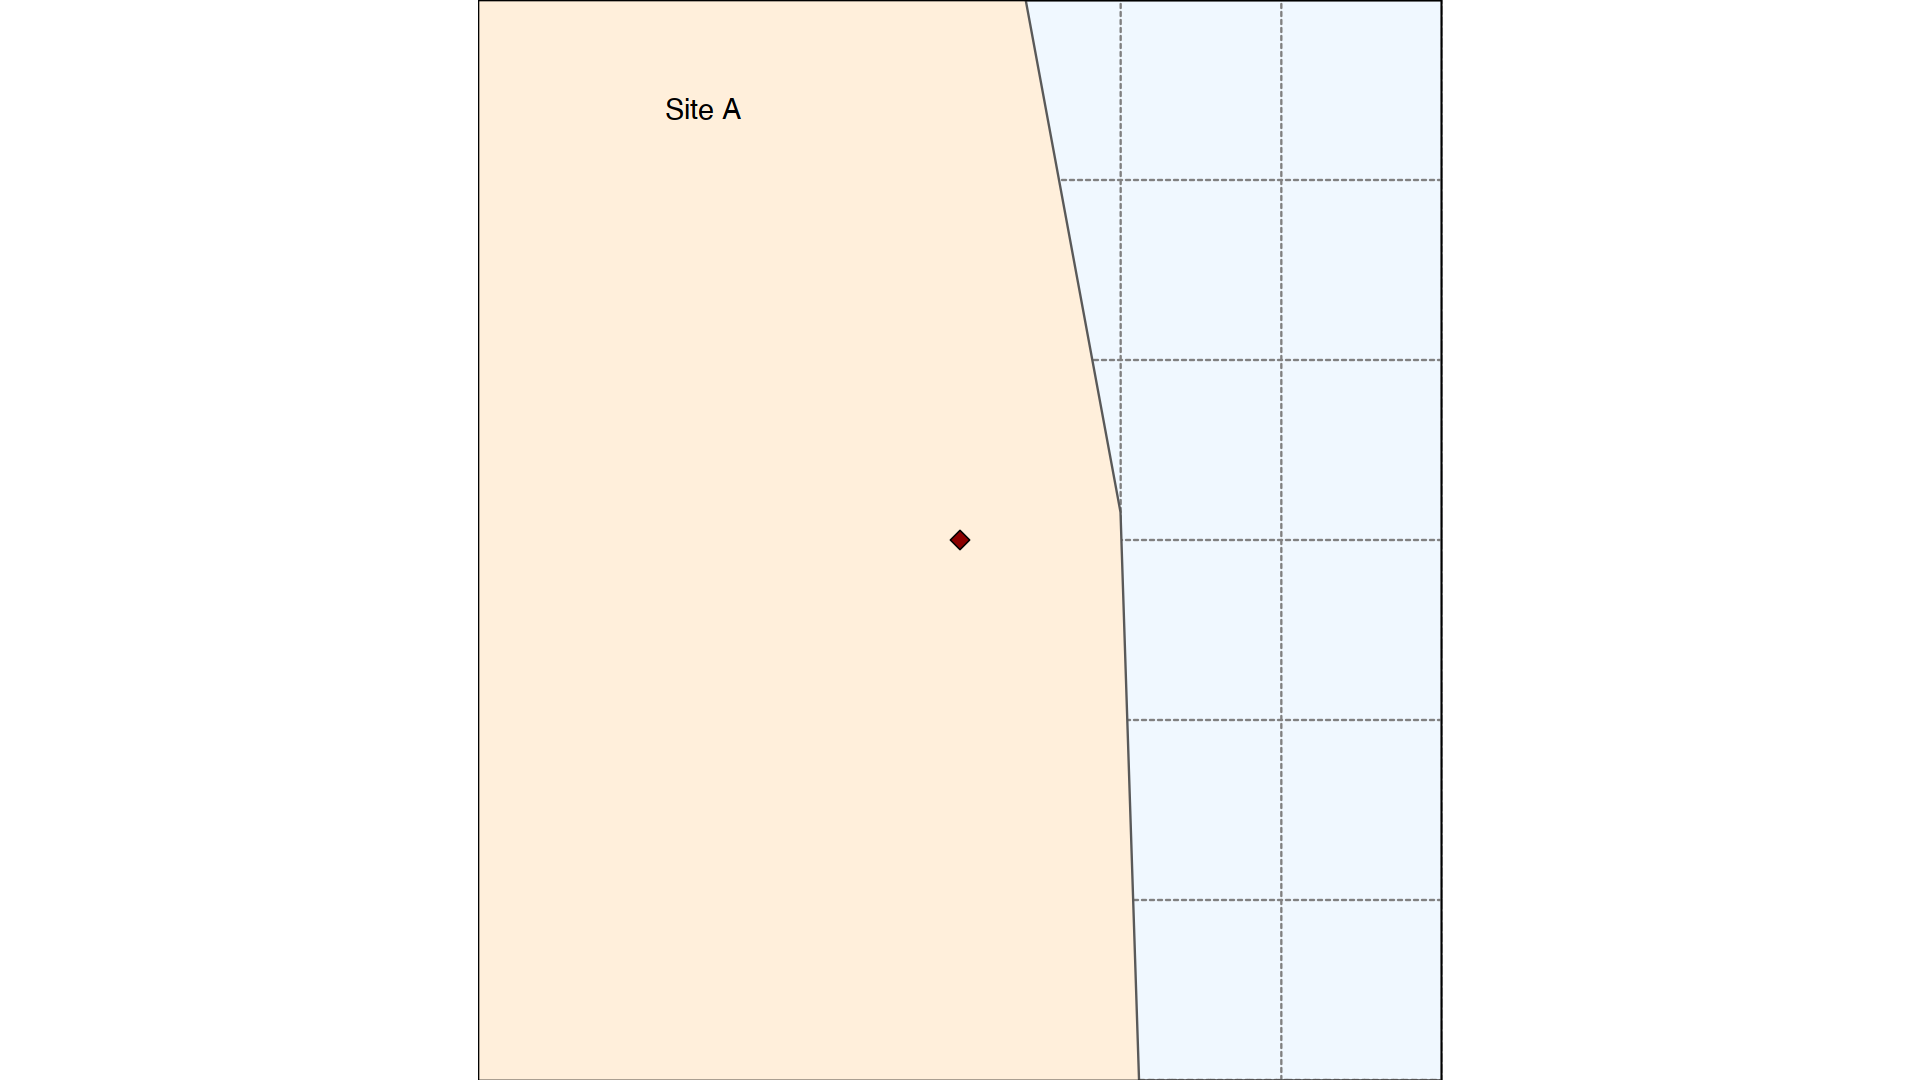

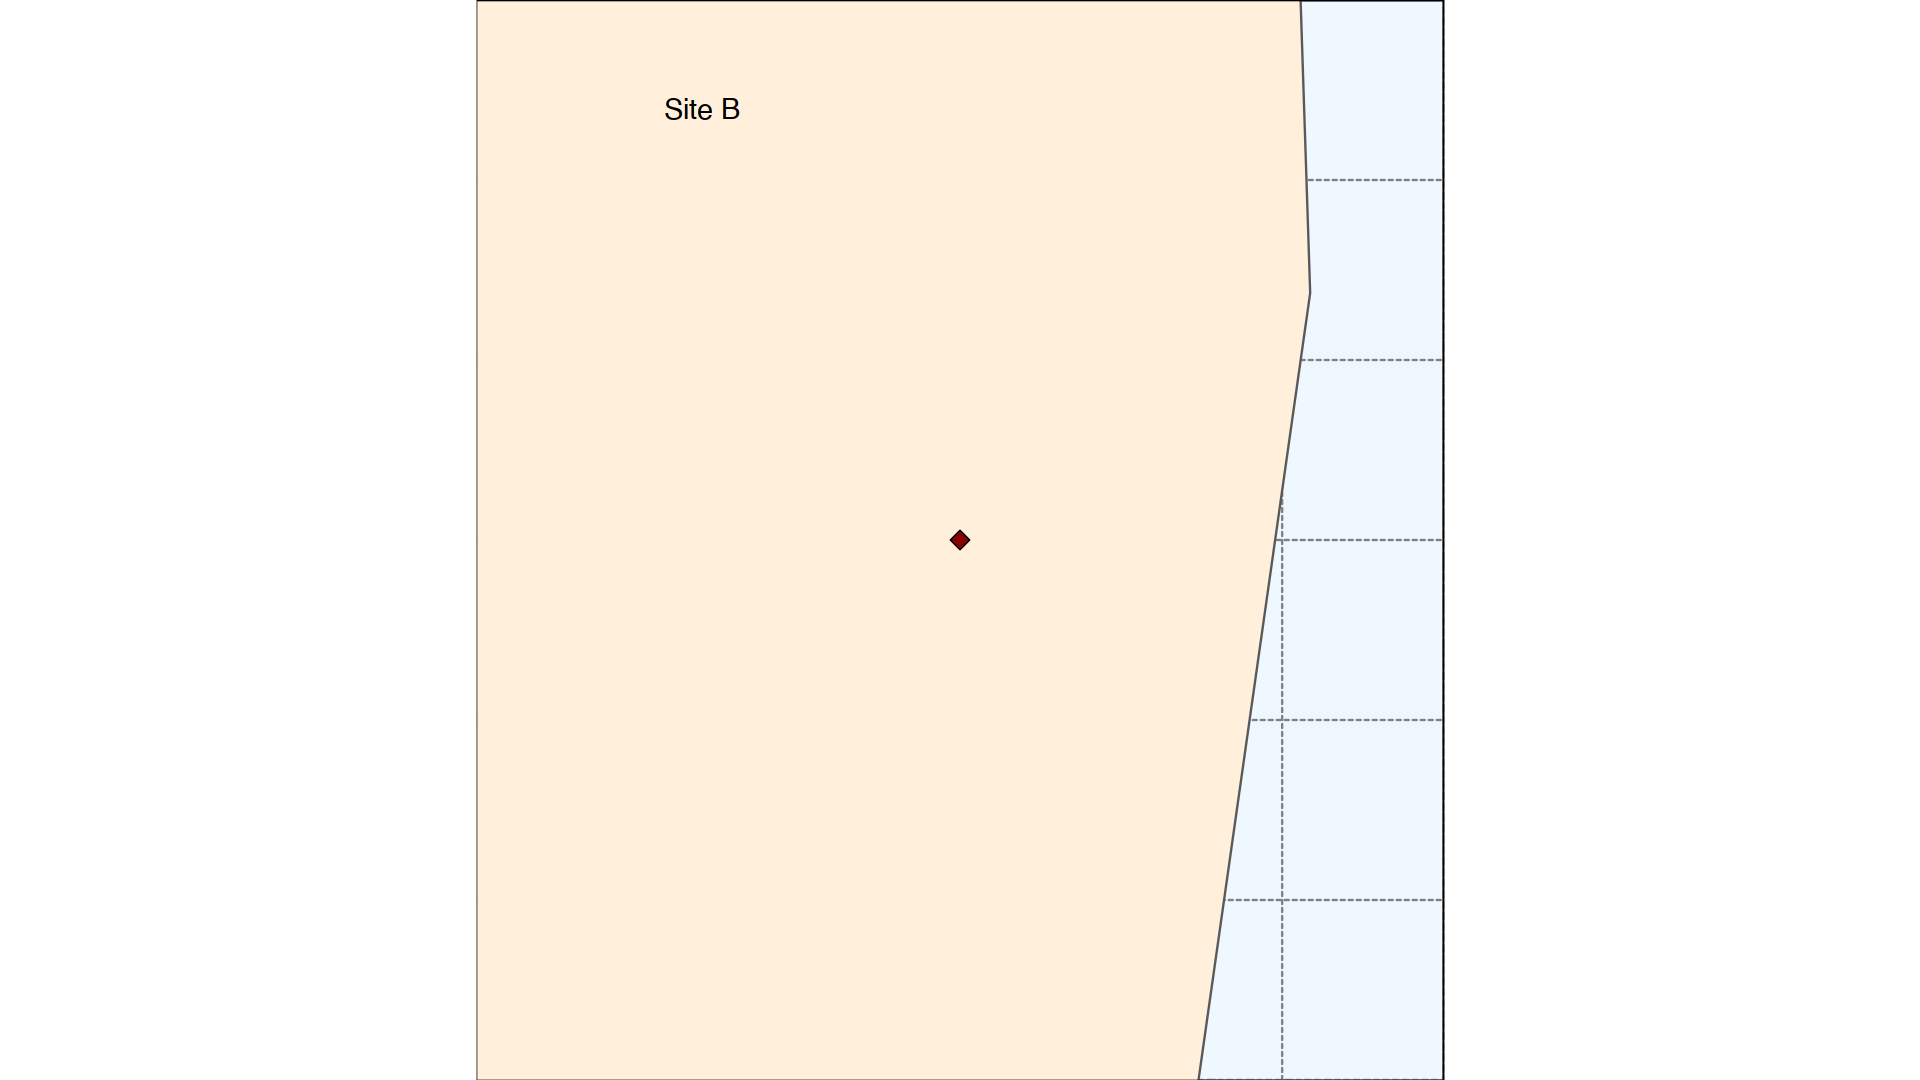

In [30]:
sites <- st_as_sf(data.frame(longitude = c(-80.15, -80.1), latitude = c(26.5, 
26.8)), coords = c("longitude", "latitude"), crs = 4326, 
agr = "constant")

(florida <- ggplot(data = world) +
     geom_sf(fill = "antiquewhite1") +
     geom_sf(data = sites, size = 4, shape = 23, fill = "darkred") +
     annotate(geom = "text", x = -85.5, y = 27.5, label = "Gulf of Mexico", 
         color = "grey22", size = 4.5) +
     coord_sf(xlim = c(-87.35, -79.5), ylim = c(24.1, 30.8)) +
     xlab("Longitude")+ ylab("Latitude")+
     theme(panel.grid.major = element_line(colour = gray(0.5), linetype = "dashed", 
         size = 0.5), panel.background = element_rect(fill = "aliceblue"), 
         panel.border = element_rect(fill = NA)))

(siteA <- ggplot(data = world) +
     geom_sf(fill = "antiquewhite1") +
     geom_sf(data = sites, size = 4, shape = 23, fill = "darkred") +
     coord_sf(xlim = c(-80.25, -79.95), ylim = c(26.65, 26.95), expand = FALSE) + 
     annotate("text", x = -80.18, y = 26.92, label= "Site A", size = 6) + 
     theme_void() + 
     theme(panel.grid.major = element_line(colour = gray(0.5), linetype = "dashed", 
         size = 0.5), panel.background = element_rect(fill = "aliceblue"), 
         panel.border = element_rect(fill = NA)))

(siteB <- ggplot(data = world) + 
     geom_sf(fill = "antiquewhite1") +
     geom_sf(data = sites, size = 4, shape = 23, fill = "darkred") +
     coord_sf(xlim = c(-80.3, -80), ylim = c(26.35, 26.65), expand = FALSE) +
     annotate("text", x = -80.23, y = 26.62, label= "Site B", size = 6) + 
     theme_void() +
     theme(panel.grid.major = element_line(colour = gray(0.5), linetype = "dashed", 
         size = 0.5), panel.background = element_rect(fill = "aliceblue"), 
         panel.border = element_rect(fill = NA)))

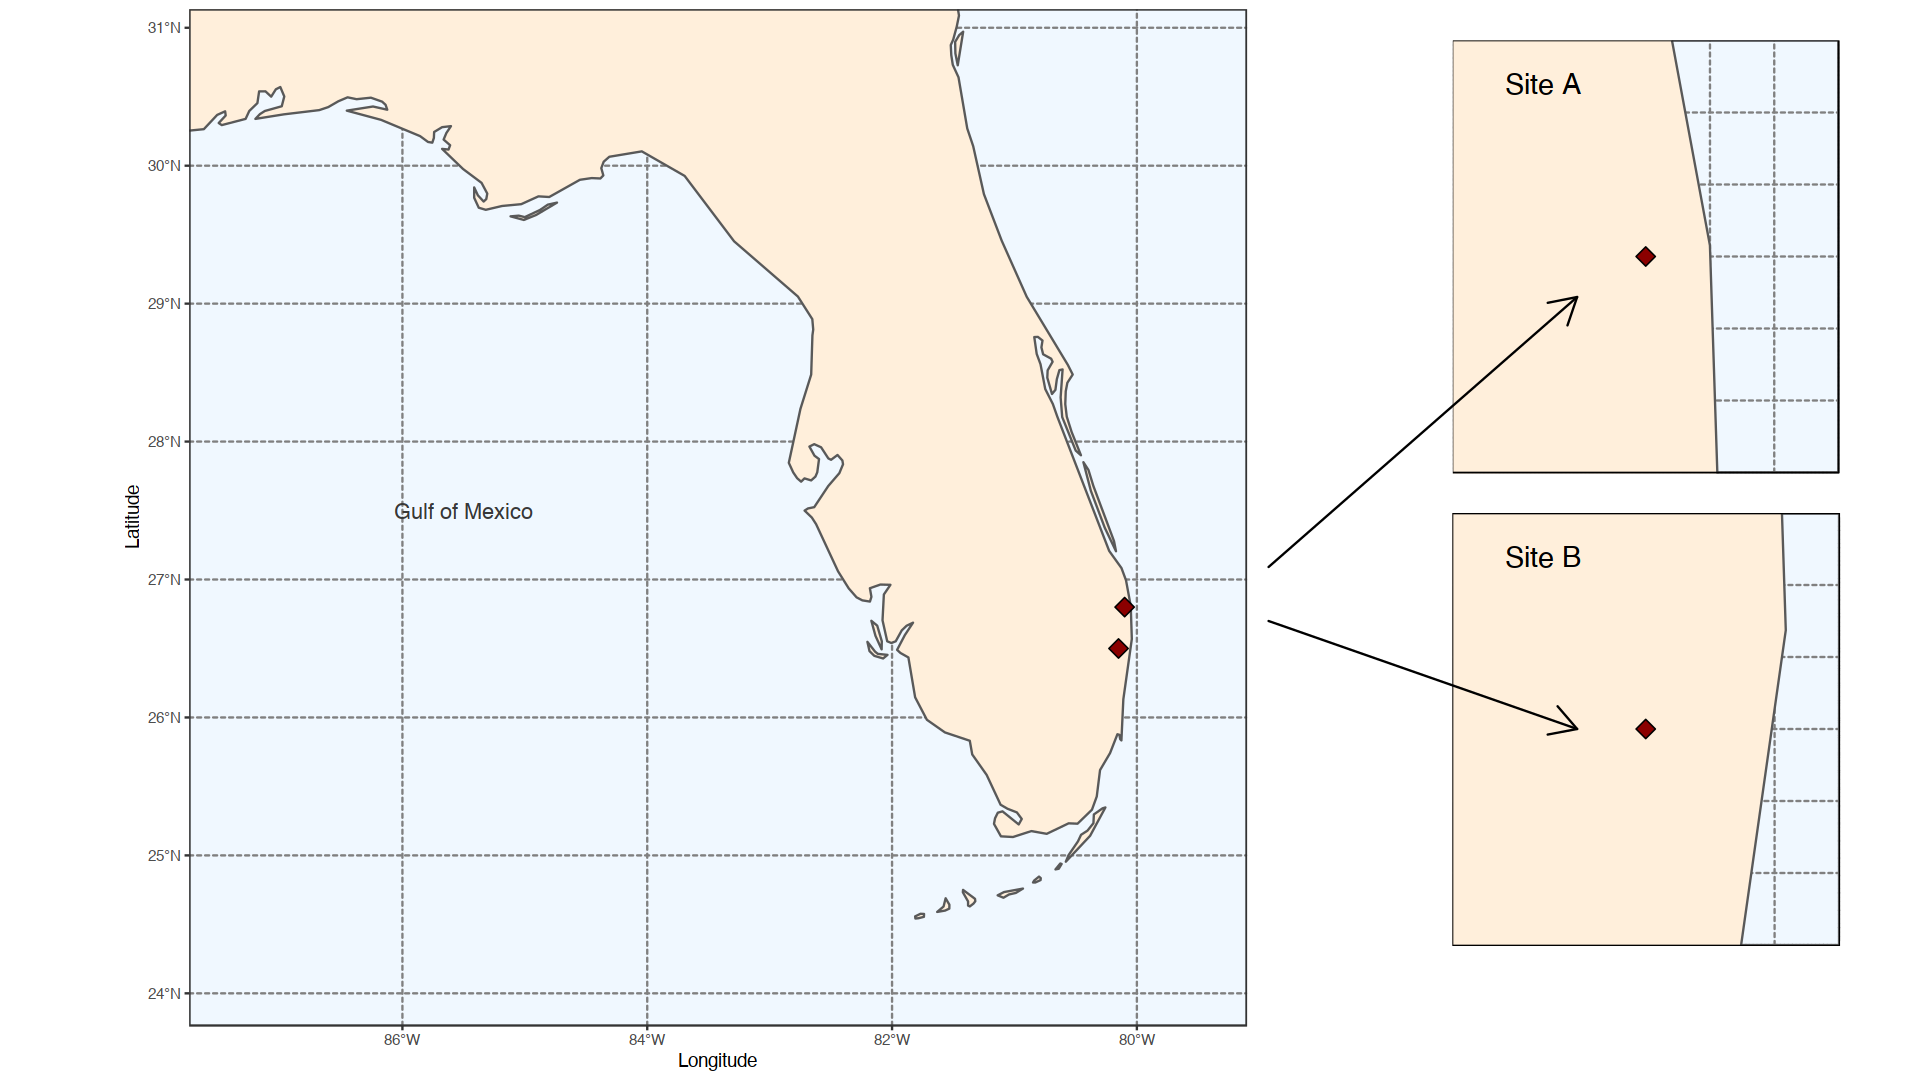

In [31]:
arrowA <- data.frame(x1 = 18.5, x2 = 23, y1 = 9.5, y2 = 14.5)
arrowB <- data.frame(x1 = 18.5, x2 = 23, y1 = 8.5, y2 = 6.5)

ggdraw(xlim = c(0, 28), ylim = c(0, 20)) +
    draw_plot(florida, x = 0, y = 0, width = 20, height = 20) +
    draw_plot(siteA, x = 20, y = 11.25, width = 8, height = 8) +
    draw_plot(siteB, x = 20, y = 2.5, width = 8, height = 8) +
    geom_segment(aes(x = x1, y = y1, xend = x2, yend = y2), data = arrowA, 
        arrow = arrow(), lineend = "round") +
    geom_segment(aes(x = x1, y = y1, xend = x2, yend = y2), data = arrowB, 
        arrow = arrow(), lineend = "round")

# Mapy Google

In [32]:
register_google(key = key)

Source : https://maps.googleapis.com/maps/api/staticmap?center=Pozna%C5%84&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx-C1AA5I

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Pozna%C5%84&key=xxx-C1AA5I



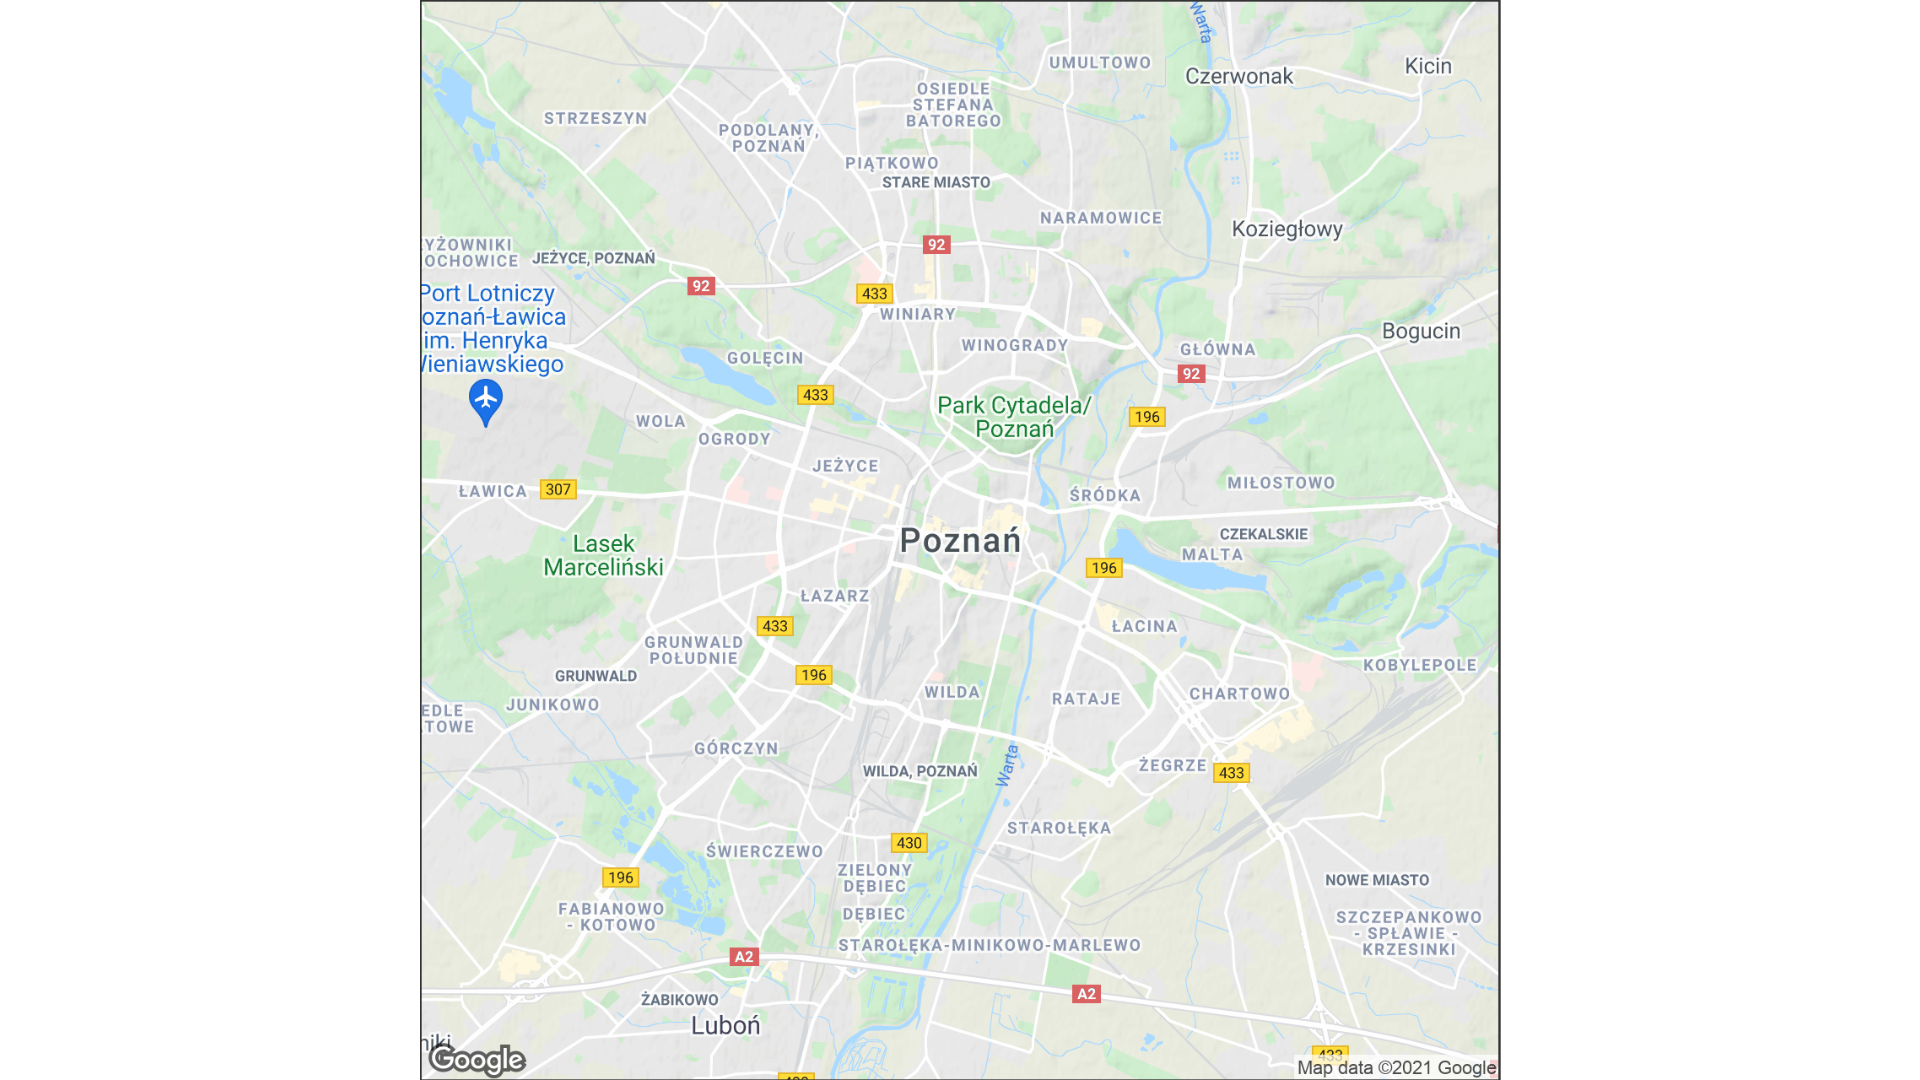

In [33]:
qmap('Poznań', zoom = 12)

# Zadania

1. Przygotuj mapę basenu Morza Śródziemnego (podobna do mapy Zatoki Meksykańskiej z Laboratorium).
2. Przygotuj mapę Alaski (podobna do mapy Florydy z Laboratorium).
3. Przygotuj mapę Danii wraz z Grenlandią (podobna do mapy USA z Laboratorium).